In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
from scipy.optimize import brentq
import random as r
import matplotlib.animation as animation
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.path as path
from sympy.solvers import solve
from sympy import Symbol

In [2]:
## from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')

plt.rcParams['savefig.dpi'] = 1080
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 21, 5

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = .11
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False  # set this to False if you do not have LaTeX installed.
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"

In [3]:
u_mag=[] #create lists for these columns in the csv file
g_mag=[]
r_mag=[]
i_mag=[]
z_mag=[]
u_err=[]
g_err=[]
r_err=[]
i_err=[]
z_err=[]

with open('data_query.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        u_mag.append(row[2])
        g_mag.append(row[3])
        r_mag.append(row[4])
        i_mag.append(row[5])
        z_mag.append(row[6])
        u_err.append(row[7])
        g_err.append(row[8])
        r_err.append(row[9])
        i_err.append(row[10])
        z_err.append(row[11])

del u_mag[0] #remove first item from the list (names of each data type)
del g_mag[0]
del r_mag[0]
del i_mag[0]
del z_mag[0]
del u_err[0]
del g_err[0]
del r_err[0]
del i_err[0]
del z_err[0]


In [4]:
def convert(s):
    try:
        float(s) #check that each data point can be converted to float
        return float(s)
    except ValueError:
        return None 

u_mag = [convert(x) for x in u_mag] #create lists of floating points
g_mag = [convert(x) for x in g_mag]
r_mag = [convert(x) for x in r_mag]
i_mag = [convert(x) for x in i_mag]
z_mag = [convert(x) for x in z_mag]
u_err = [convert(x) for x in u_err]
g_err = [convert(x) for x in g_err]
r_err = [convert(x) for x in r_err]
i_err = [convert(x) for x in i_err]
z_err = [convert(x) for x in z_err]
UR = []
GR = []
RI = []
RZ = []
for i, j in zip(u_mag, r_mag):
    try: 
        UR.append(round(i - j,2))
    except:
        UR.append(None)
        
for i, j in zip(g_mag, r_mag):
    try: 
        GR.append(round(i - j,2))
    except:
        GR.append(None)

for i, j in zip(r_mag, i_mag):
    try: 
        RI.append(round(i - j,2))
    except:
        RI.append(None)
        
for i, j in zip(r_mag, z_mag):
    try: 
        RZ.append(round(i - j,2))
    except:
        RZ.append(None)


In [5]:
URhist = []
GRhist = []
RIhist = []
RZhist = []
u_err_hist=[]
g_err_hist=[]
r_err_hist=[]
i_err_hist=[]
z_err_hist=[]
for i in UR:
    if type(i) == float:
        URhist.append(i)
for i in GR:
    if type(i) == float:
        GRhist.append(i)
for i in RI:
    if type(i) == float:
        RIhist.append(i)
for i in RZ:
    if type(i) == float:
        RZhist.append(i)
for i in u_err:
    if type(i) == float:
        u_err_hist.append(i)
for i in g_err:
    if type(i) == float:
        g_err_hist.append(i)
for i in r_err:
    if type(i) == float:
        r_err_hist.append(i)
for i in i_err:
    if type(i) == float:
        i_err_hist.append(i)
for i in z_err:
    if type(i) == float:
        z_err_hist.append(i)

In [6]:
print("UR length is ", len(URhist))
print("GR length is ", len(GRhist))
print("RI length is ", len(RIhist))
print("RZ length is ", len(RZhist))

UR length is  219760
GR length is  219667
RI length is  219911
RZ length is  219783


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


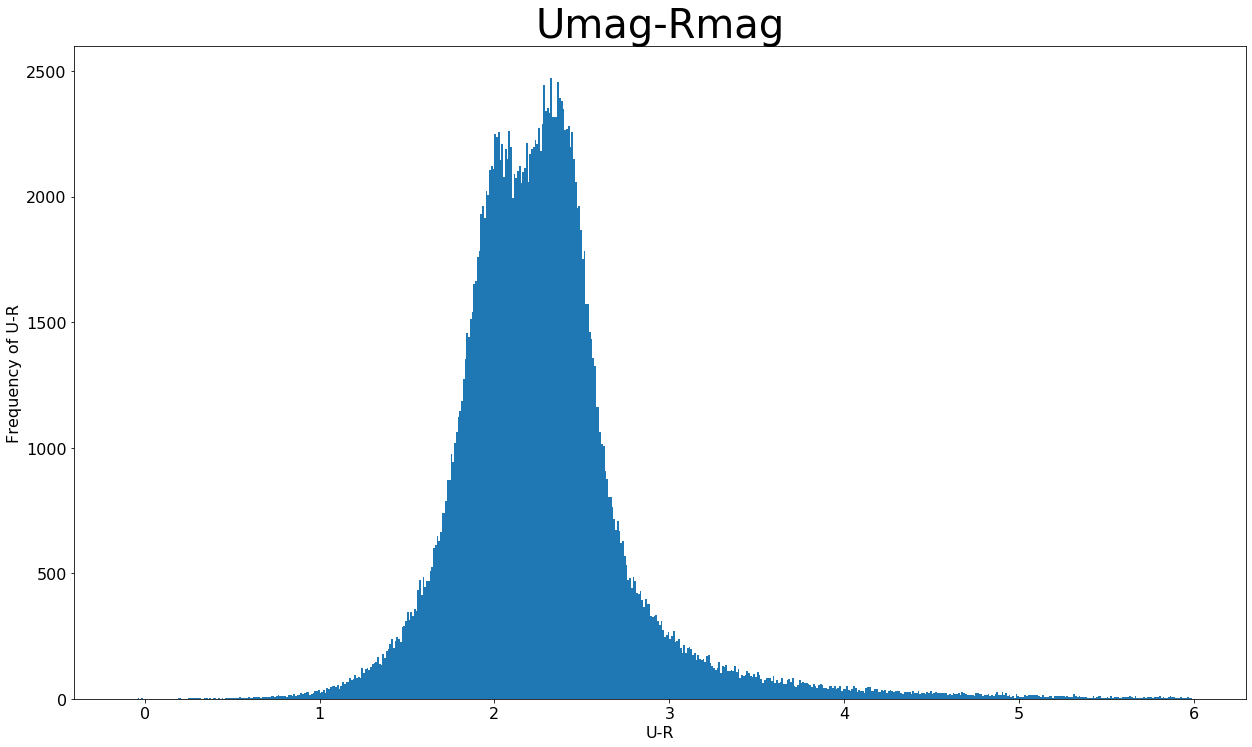

In [7]:
plt.figure(figsize=(21,12))
#plt.hist(URhist, bins=np.arange(int(min(UR)), int(max(UR)) + 1, 0.01))
plt.hist(URhist, bins=np.arange(-0.1,6,0.01))
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
plt.title('Umag-Rmag')
plt.show()

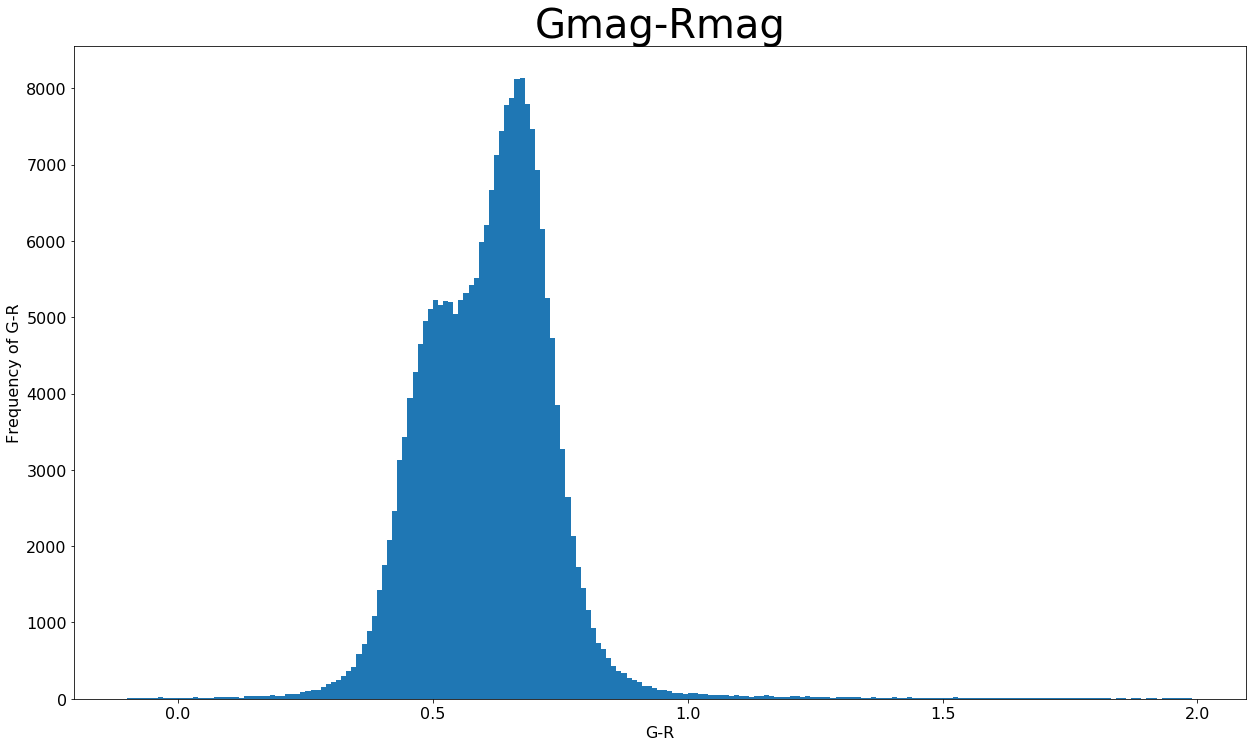

In [8]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(GRhist, bins=np.arange(-.1,2,0.01))
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.title('Gmag-Rmag')
plt.show()

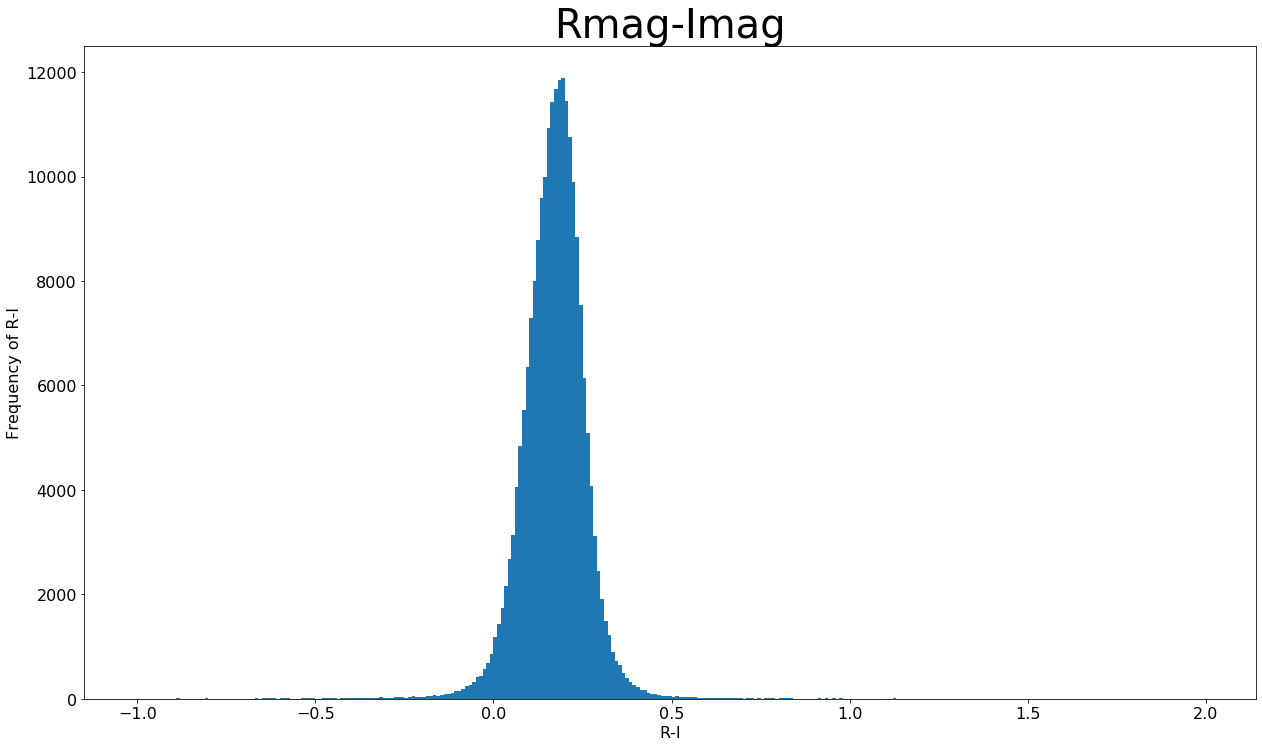

In [9]:
plt.figure(figsize=(21,12))
#plt.hist(RIhist, bins=np.arange(int(min(RI)), int(max(RI)) + 1, 0.01))
plt.hist(RIhist, bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.title('Rmag-Imag')
plt.show()

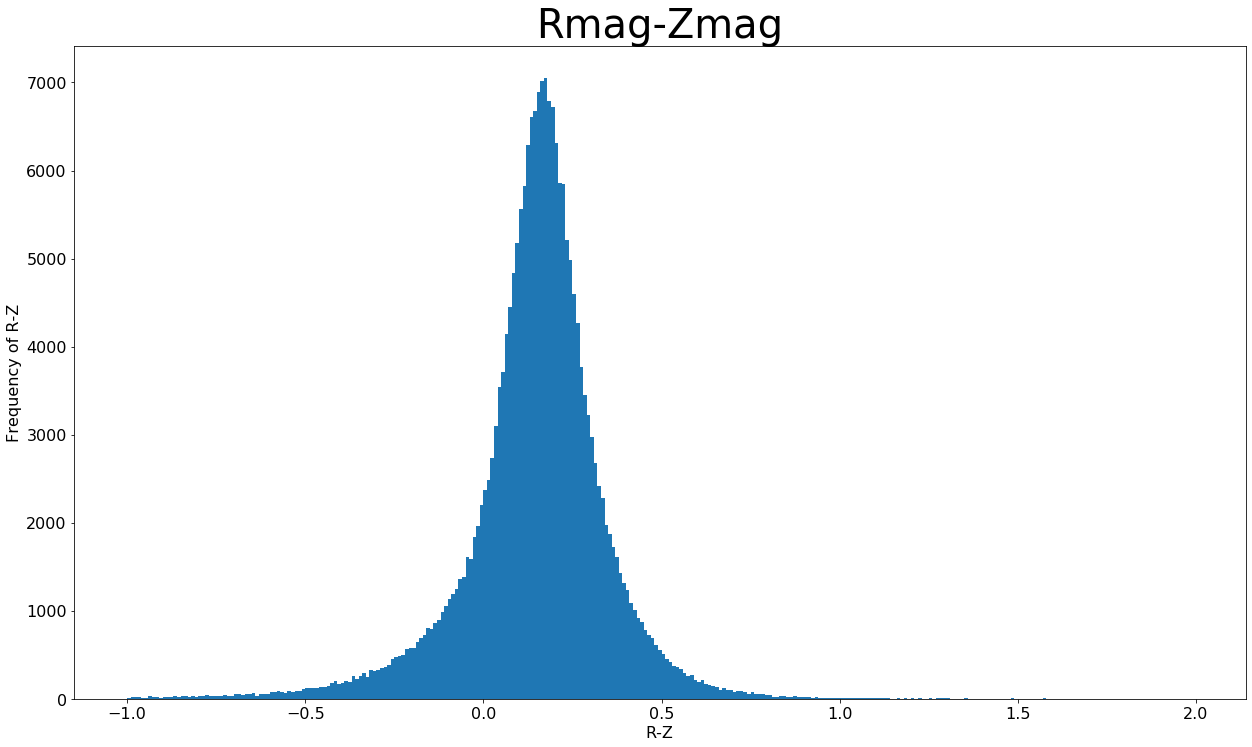

In [10]:
plt.figure(figsize=(21,12))
#plt.hist(RZhist, bins=np.arange(int(min(RI)), int(max(RI)) + 1, 0.01))
plt.hist(RZhist, bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.title('Rmag-Zmag')
plt.show()

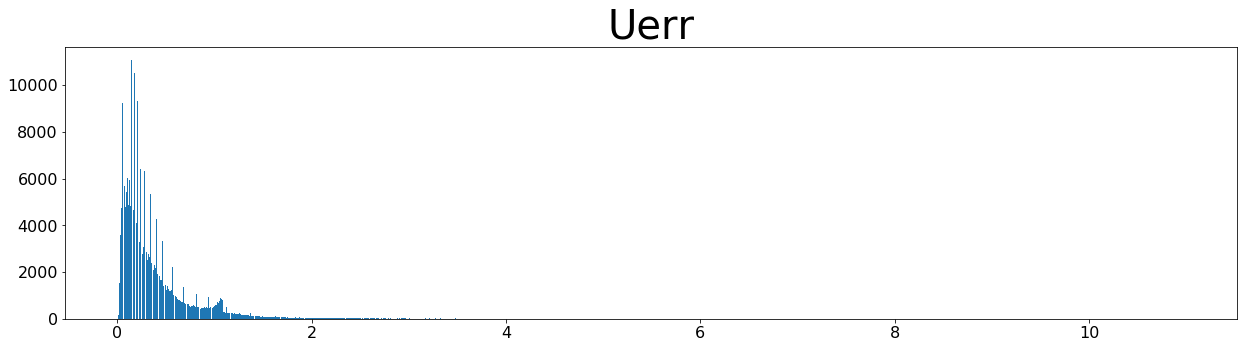

In [11]:
plt.figure()
plt.hist(u_err_hist, bins=np.arange((min(u_err_hist)), (max(u_err_hist)) + 1, 0.01))
plt.title('Uerr')
plt.show()

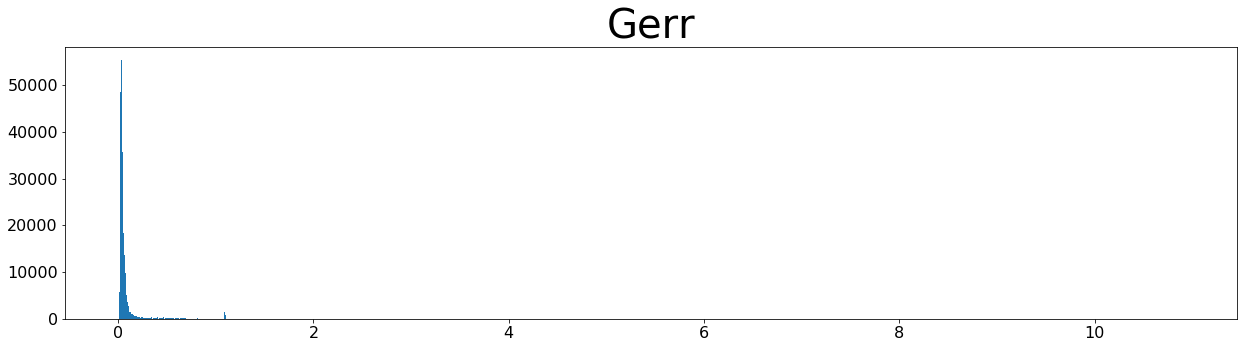

In [12]:
plt.figure()
plt.hist(g_err_hist, bins=np.arange((min(g_err_hist)), (max(g_err_hist)) + 1, 0.01))
plt.title('Gerr')
plt.show()

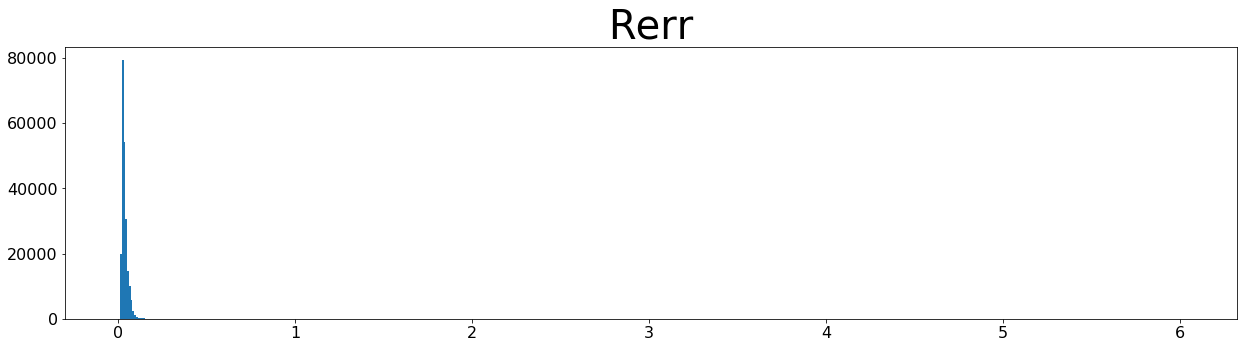

In [13]:
plt.figure()
plt.hist(r_err_hist, bins=np.arange((min(r_err_hist)), (max(r_err_hist)) + 1, 0.01))
plt.title('Rerr')
plt.show()

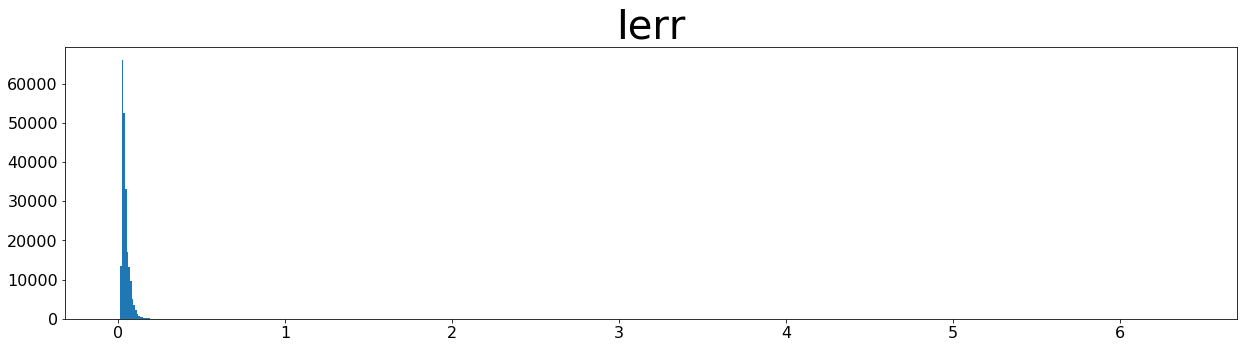

In [14]:
plt.figure()
plt.hist(i_err_hist, bins=np.arange((min(i_err_hist)), (max(i_err_hist)) + 1, 0.01))
plt.title('Ierr')
plt.show()

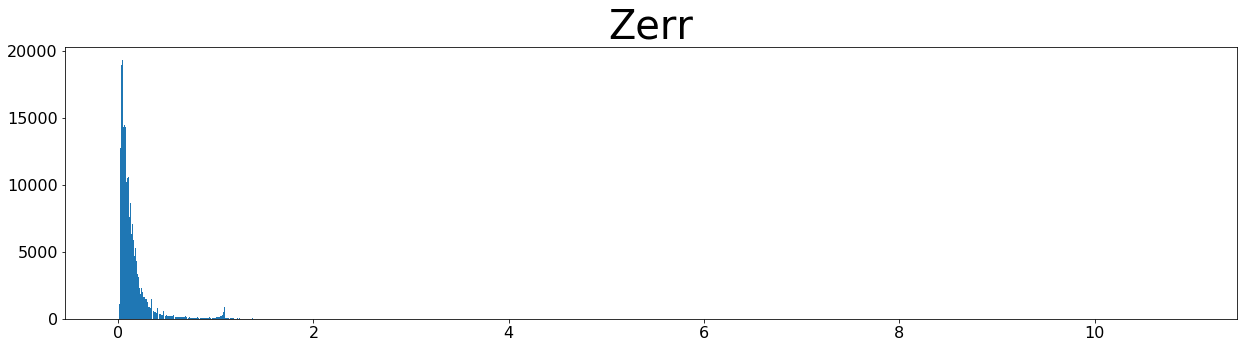

In [15]:
plt.figure()
plt.hist(z_err_hist, bins=np.arange((min(z_err_hist)), (max(z_err_hist)) + 1, 0.01))
plt.title('Zerr')
plt.show()

In [16]:
def gaussian(y, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((y - mean)**2 / (2*standard_deviation**2)))

def twogaussians(y,mean1,amplitude1,standard_deviation1,mean2,amplitude2,standard_deviation2):
    return (amplitude1 * np.exp( - ((y - mean1)**2 / (2*standard_deviation1**2)))) + (amplitude2 * np.exp( - ((y - mean2)**2 / (2*standard_deviation2**2))))

def halfgaussian(y, mean, amplitude, standard_deviation):
    return amplitude * sp.exp( - ((y - mean)**2 / (2*standard_deviation**2))) - (amplitude/2)

In [17]:
def getthreshold(err,frac): # takes list of error values, what fraction of them is to be saved (eg keep 90%)
    errsorted = sorted(err) #arrange error list in ascending order
    index = int(frac*len(err)) #what index value contains this fraction of the list (90% of the list with lowest values)
    threshold = errsorted[index]
    return threshold

#takes original error lists that have the corresponding index values in UR, GR etc, and error lists without Nonetype, to
#use in getthreshold function, list to be reduced, and the fraction of lists to be saved
#returns new list for refined histogram
def reducedlists(list1,err1,err2,err1hist,err2hist):
    histlists = []
    allerrs = []
    for i in range(len(err1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#            newerr = round(err1[i]**2 + err2[i]**2,3)
            newerr = err1[i]*err2[i]
            allerrs.append(newerr)
    toterrs = list(set(allerrs))
    toterrs.sort()
    for n in toterrs:
        newlist=[]
        for i in range(len(list1)):
            if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#                if err1[i]*err1[i]+err2[i]*err2[i]<=n:
                if err1[i]*err2[i]<=n:

                    newlist.append(list1[i])
        if len(histlists) == 0:
            if len(newlist) > 0:
                histlists.append(newlist)
        else:
            if len(newlist)/len(histlists[-1])>=1.001:
                histlists.append(newlist)
        
    return histlists

def newreducedlists(list1,err1,err2,err1hist,err2hist):
    """
    Does the exact same thing as the last reduced list function but 'faster'
    
    INPUTS:
    list1     -
    err1      -
    err2      -
    err1hist  -
    err2hist  -
    
    RETURNS:
    histlists -
    
    """
    histlists = []
    allerrs = []
    oldlist = []
    indexes = list(range(len(list1)))
    newindexes = indexes
    
    counter = [0,0,0]
    counter2 = 0
    counter3=[]
    for i in range(len(err1)):
        counter[0]+=1 # debug counter position 0
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
#            newerr = round(err1[i]**2 + err2[i]**2,3)
            newerr = err1[i]*err2[i]
            allerrs.append(newerr)
    toterrs = list(set(allerrs))
    toterrs.sort()
    for n in toterrs:
        counter[1] +=1 # debug counter position 1
        newlist = oldlist
        for i in indexes:
            counter[2] +=1 # debug counter position 2
            if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
                if err1[i]*err2[i]<=n:
                    newlist.append(list1[i])
                    newindexes.remove(i)
                    counter3.append([i,n])
            else:
                newindexes.remove(i)
        if len(histlists) == 0:
            if len(newlist) > 0:
                counter2
                histlists.append(newlist)
                counter2 +=1
            else:
                print('my list is empty!')
        else:
                if len(newlist)/len(histlists[-1])>=1.001:
                    histlists.append(newlist)
                    counter2 +=1
        oldlist = newlist
        indexes = newindexes
        
    print(counter)
    print(counter2)
    return histlists
    

def reducedlist(list1,err1,err2,err1hist,err2hist,frac):
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if err1[i]*err2[i] <= threshold1*threshold2:
                newlist.append(list1[i])
    return newlist

def reducedlist1(list1,err1,err2,err1hist,err2hist,frac): 
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if err1[i] <= threshold1 and err2[i] <= threshold2:
                newlist.append(list1[i])
    return newlist

def inverselist(list1,err1,err2,err1hist,err2hist,frac):
    newlist = [] 
    threshold1 = getthreshold(err1hist,frac)
    threshold2 = getthreshold(err2hist,frac)
    for i in range(len(list1)):
        if (type(list1[i]) == float) and (type(err1[i]) == float) and (type(err2[i]) == float):
            if not (err1[i] <= threshold1 and err2[i] <= threshold2):
                newlist.append(list1[i])
    return newlist

In [18]:
GRhists = reducedlists(GR,g_err,r_err,g_err_hist,r_err_hist)

In [19]:
URhists = reducedlists(UR,u_err,r_err,u_err_hist,r_err_hist)

In [20]:
RIhists = reducedlists(RI,r_err,i_err,r_err_hist,i_err_hist)

In [21]:
RZhists = reducedlists(RZ,r_err,z_err,r_err_hist,z_err_hist)

In [22]:
#DO GETPARAMS1 FUNCTION HERE FOR SINGLE GAUSSIANS
def getparams1(histlist,AB):
    bin_heights, bin_borders, _ = plt.hist(histlist, bins=np.arange(min(histlist),max(histlist),0.01))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    bincenters = bin_centers.tolist()
    binheights = bin_heights.tolist()
    onepeakINDX = binheights.index(max(binheights))
    if AB == RI:
        meanguess = .18
        stdguess = .06
    if AB == RZ:
        meanguess = .12
        stdguess = .65
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=(meanguess,max(binheights),stdguess))
    return popt

In [23]:
def getparams2(histlist,AB):
    bin_heights, bin_borders, _ = plt.hist(histlist, bins=np.arange(min(histlist),max(histlist),0.01))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    bincenters = bin_centers.tolist()
    binheights = bin_heights.tolist()
    if AB == UR:
        leftguess = 2
        rightguess = 2.4
        stdguess = .15
    if AB == GR:
        leftguess = .45
        rightguess = .67
        stdguess = .05
    popt, _ = curve_fit(twogaussians, bin_centers, bin_heights,p0=(leftguess,max(bin_heights),stdguess,rightguess,max(bin_heights),stdguess),maxfev=5000)
    return popt

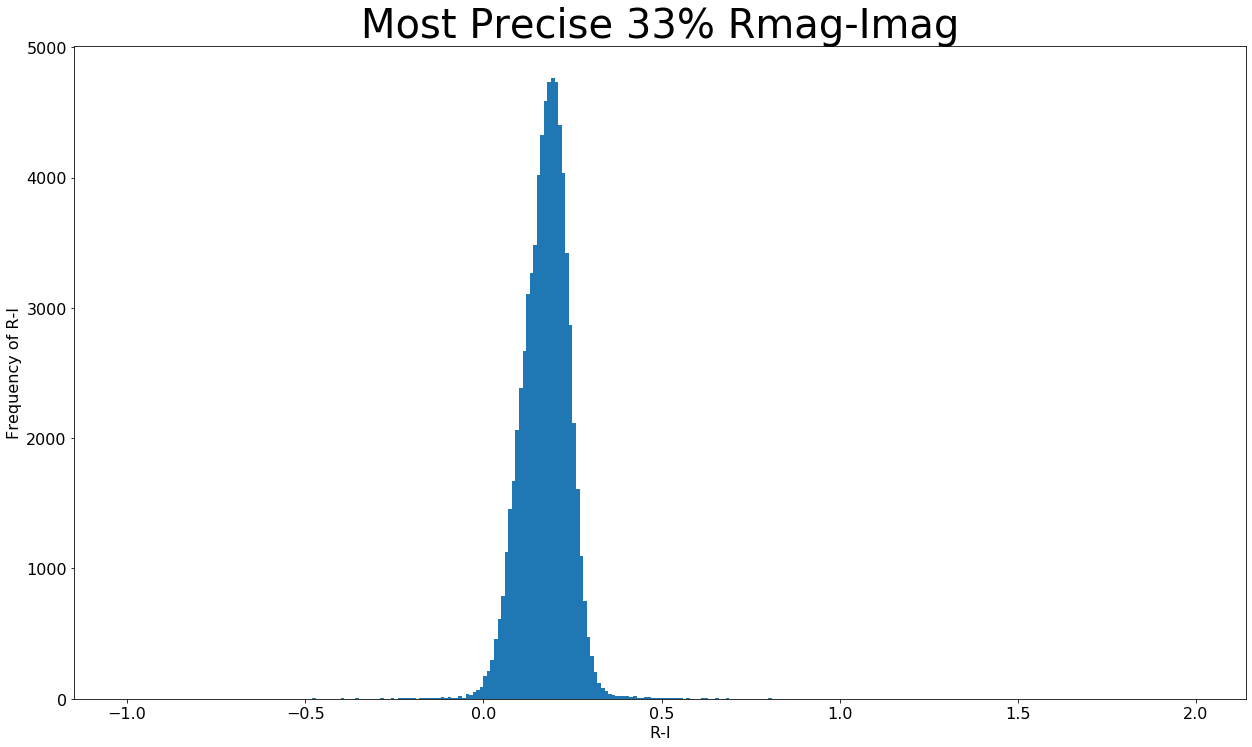

In [24]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(RIhists[4], bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.title('Most Precise 33% Rmag-Imag')
plt.show()

In [25]:
len(RIhists[4])/len(RIhist)

0.3335258354516145

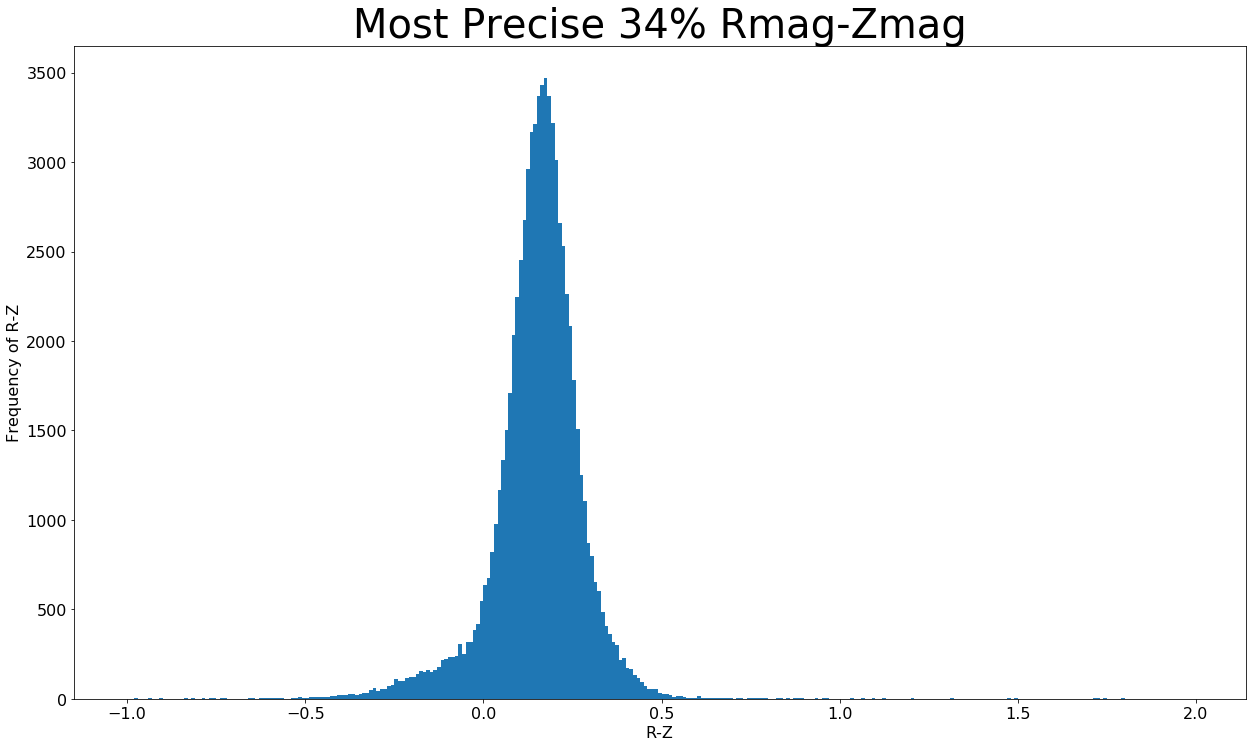

In [26]:
plt.figure(figsize=(21,12))

plt.hist(RZhists[11], bins=np.arange(-1,2,0.01))
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.title('Most Precise 34% Rmag-Zmag')
plt.show()

In [27]:
len(RZhists[11])/len(RZhist)

0.3433750563055377

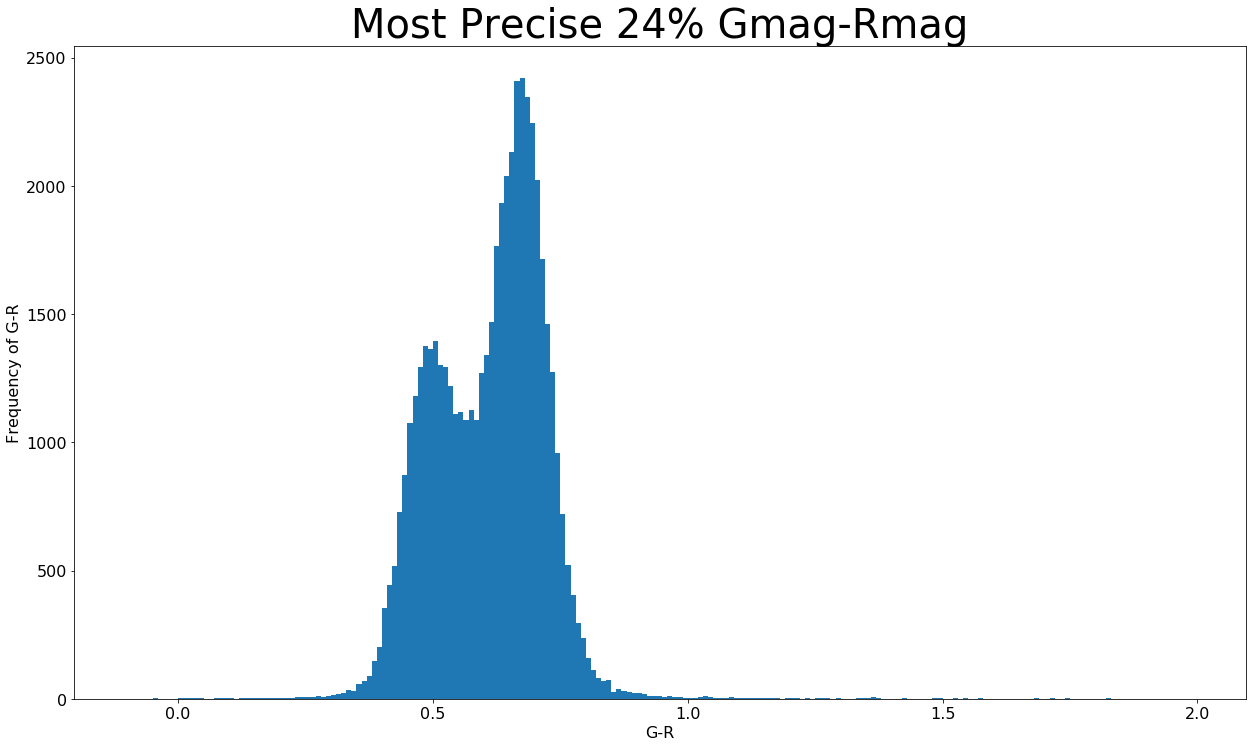

In [28]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(GRhists[4], bins=np.arange(-.1,2,0.01))
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.title('Most Precise 24% Gmag-Rmag')
plt.show()

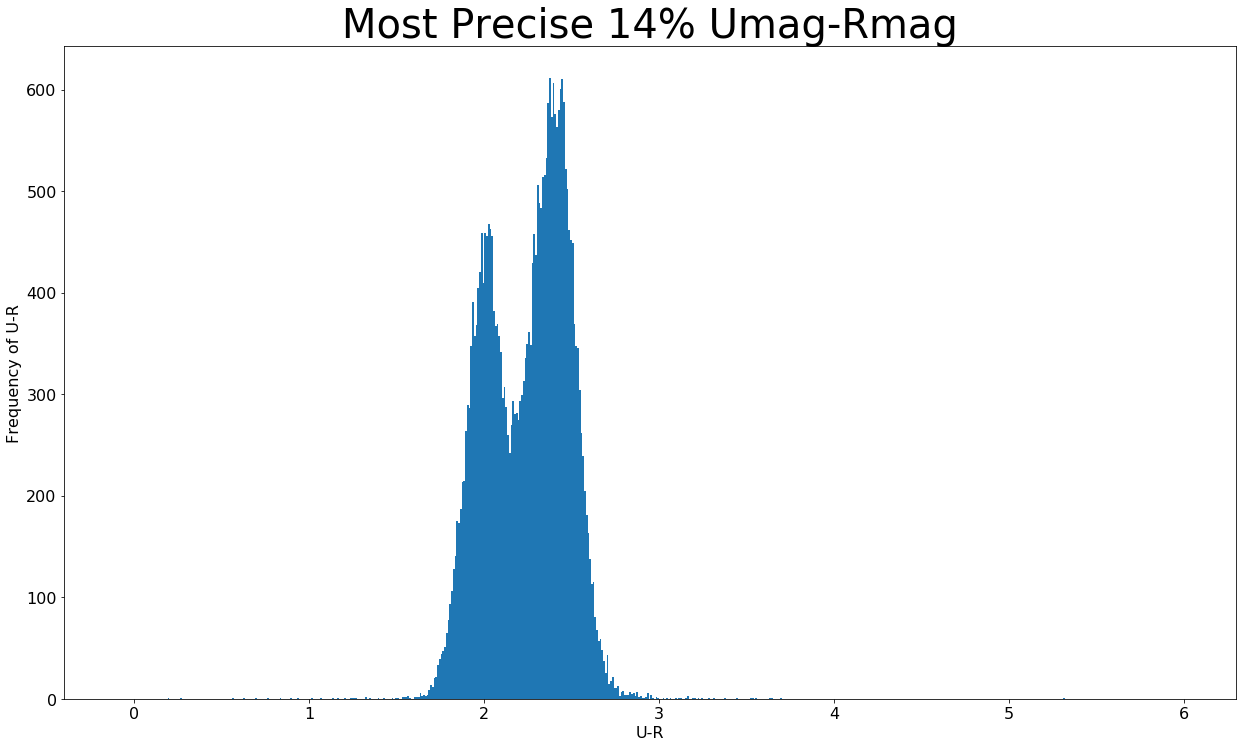

In [29]:
plt.figure(figsize=(21,12))
#plt.hist(GRhist, bins=np.arange(int(min(GR)), int(max(GR)) + 1, 0.01))
plt.hist(URhists[15], bins=np.arange(-0.1,6,0.01))
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
plt.title('Most Precise 14% Umag-Rmag')
plt.show()

In [30]:
len(URhists[15])/len(URhist)

0.1419093556607208

In [31]:
def linearline(x,m,b):
    y = []
    for i in x:
        y.append(i*m+b)
    return y

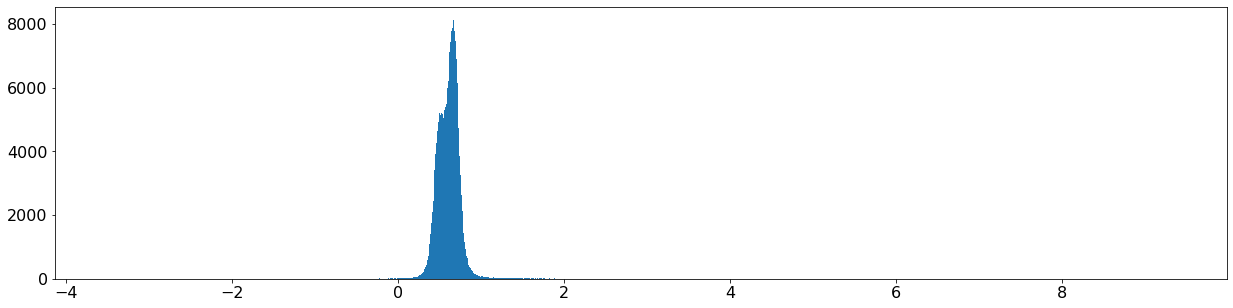

In [32]:
GRparams = []

for m in range(1,len(GRhists)):
    mparams = getparams2(GRhists[m],GR)
    GRparams.append(mparams)

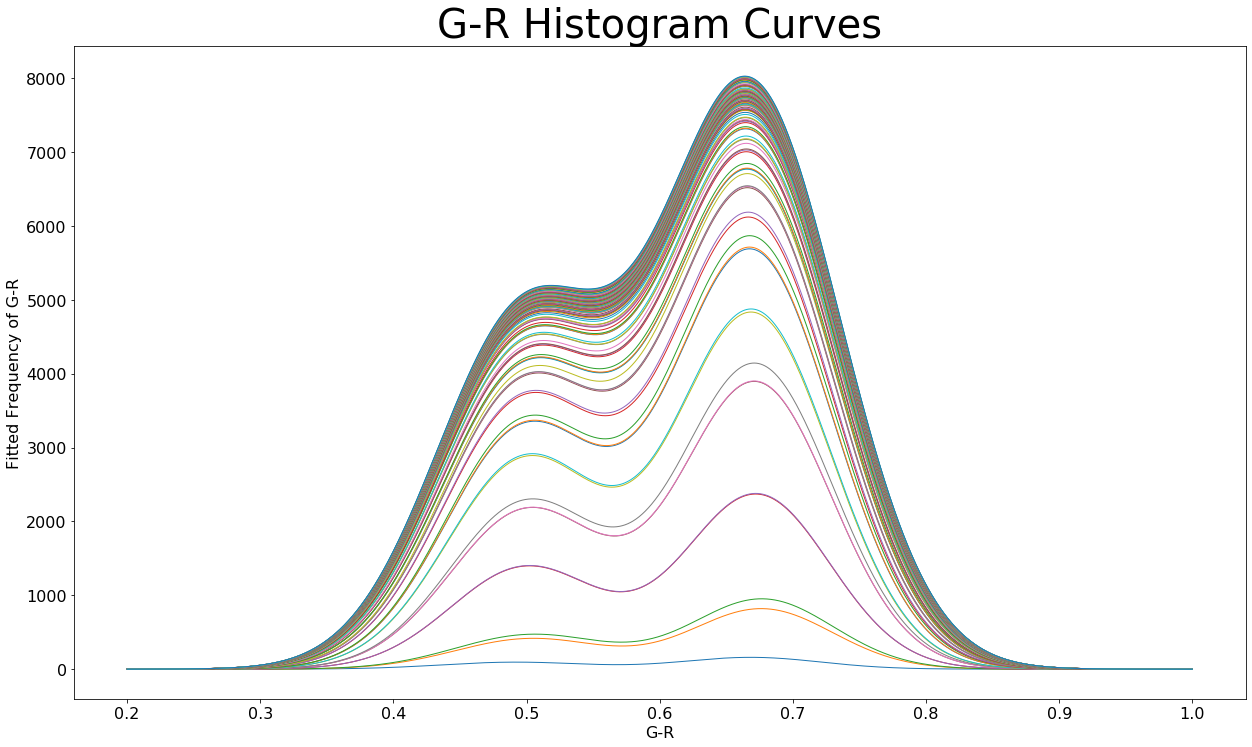

In [33]:
x_interval = np.linspace(0.2, 1.0, 10000)

plt.figure(figsize=(21,12))
plt.title('G-R Histogram Curves')
plt.ylabel('Fitted Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
for m in range(len(GRparams)):
    plt.plot(x_interval, twogaussians(x_interval, *GRparams[m]))


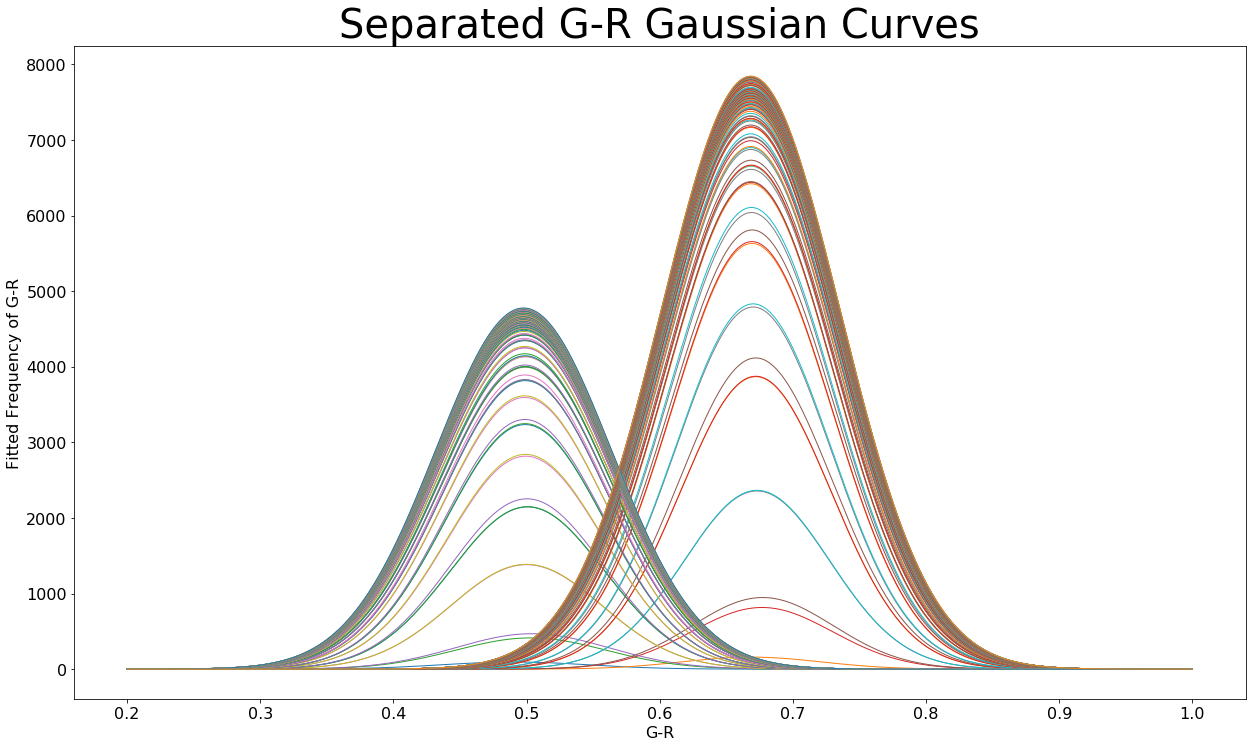

In [34]:
x_interval = np.linspace(0.2, 1.0, 10000)

plt.figure(figsize=(21,12))
plt.title('Separated G-R Gaussian Curves')
plt.ylabel('Fitted Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
for m in range(len(GRparams)):
    plt.plot(x_interval, gaussian(x_interval, GRparams[m][0],GRparams[m][1],GRparams[m][2]))
    plt.plot(x_interval, gaussian(x_interval, GRparams[m][3],GRparams[m][4],GRparams[m][5]))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


[8.13145941e-08 1.31515044e-01] [1.41928703e-07 1.23770844e-01]


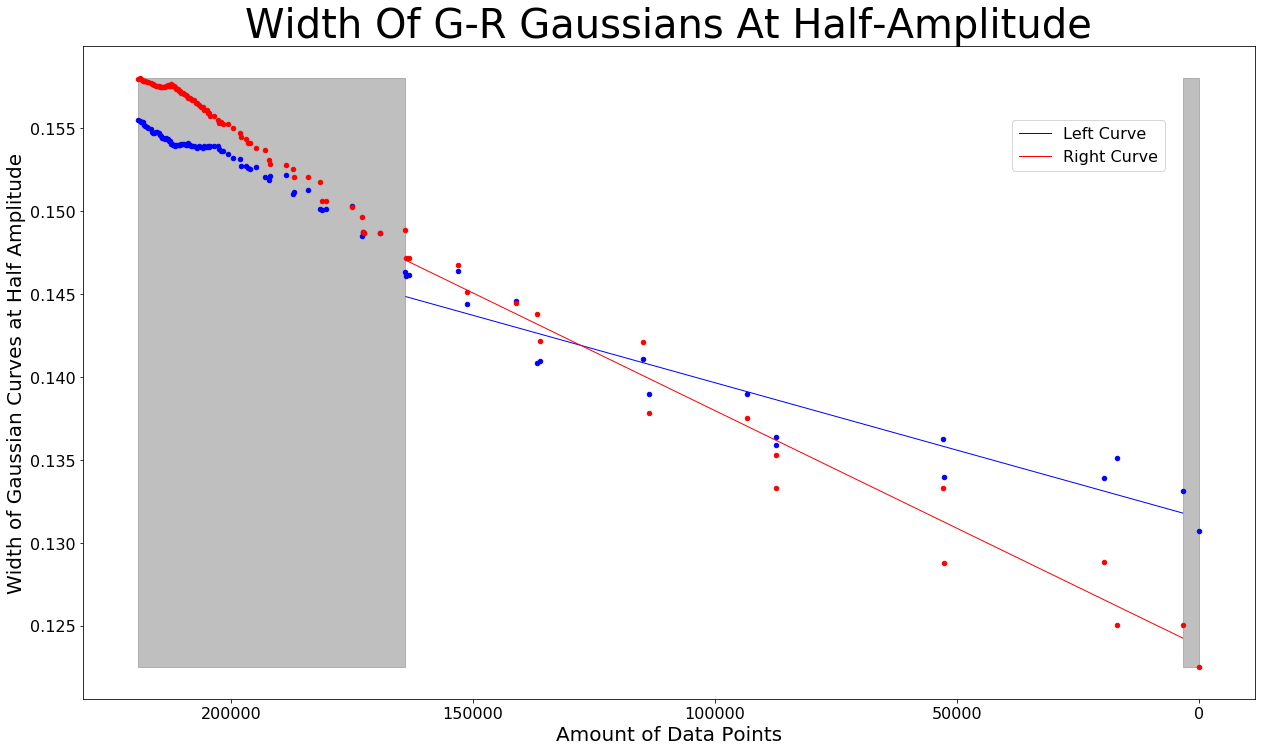

In [35]:
halfwidths1 = []
halfwidths2 = []
amps1 = []
amps2 = []
lengths = []
avgGR1 = []
avgGR2 = []
plt.figure(figsize=(21,12))
plt.title('Width Of G-R Gaussians At Half-Amplitude')
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
ax = plt.gca()
ax.invert_xaxis()
for m in range(len(GRparams)):
    avg1 = GRparams[m][0]
    avgGR1.append(avg1)
    amp1 = GRparams[m][1]
    stdev1 = GRparams[m][2]
    avg2 = GRparams[m][3]
    avgGR2.append(avg2)
    amp2 = GRparams[m][4]
    stdev2 = GRparams[m][5]
    lengths.append(len(GRhists[m]))
    zero1=brentq(halfgaussian,0.1,avg1,args=(avg1, amp1, stdev1))
    zero2=brentq(halfgaussian,avg1,0.8,args=(avg1, amp1, stdev1))
    zero3=brentq(halfgaussian,0.4,avg2,args=(avg2, amp2, stdev2))
    zero4=brentq(halfgaussian,avg2,0.8,args=(avg2, amp2, stdev2))
    zerodiff1 = zero2-zero1
    zerodiff2 = zero4-zero3
    halfwidths1.append(zerodiff1)
    halfwidths2.append(zerodiff2)
    amps1.append(amp1)
    amps2.append(amp2)
end = 18
plt.fill_between(lengths[end:],len(lengths[end:])*[max(halfwidths2)],len(lengths[end:])*[min(halfwidths2)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths2)],len(lengths[:2])*[min(halfwidths2)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths1,s=20,color="blue")
plt.scatter(lengths,halfwidths2,s=20,color="red")

HAparamsGR1, _ = curve_fit(linearline,lengths[1:end],halfwidths1[1:end])
HAparamsGR2, _ = curve_fit(linearline,lengths[1:end],halfwidths2[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsGR1),color="blue",label = "Left Curve")
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsGR2),color="red", label = "Right Curve")
plt.legend(loc='best', bbox_to_anchor=(0.43, 0.4, 0.5, 0.5),fontsize='16')


print(HAparamsGR1,HAparamsGR2)

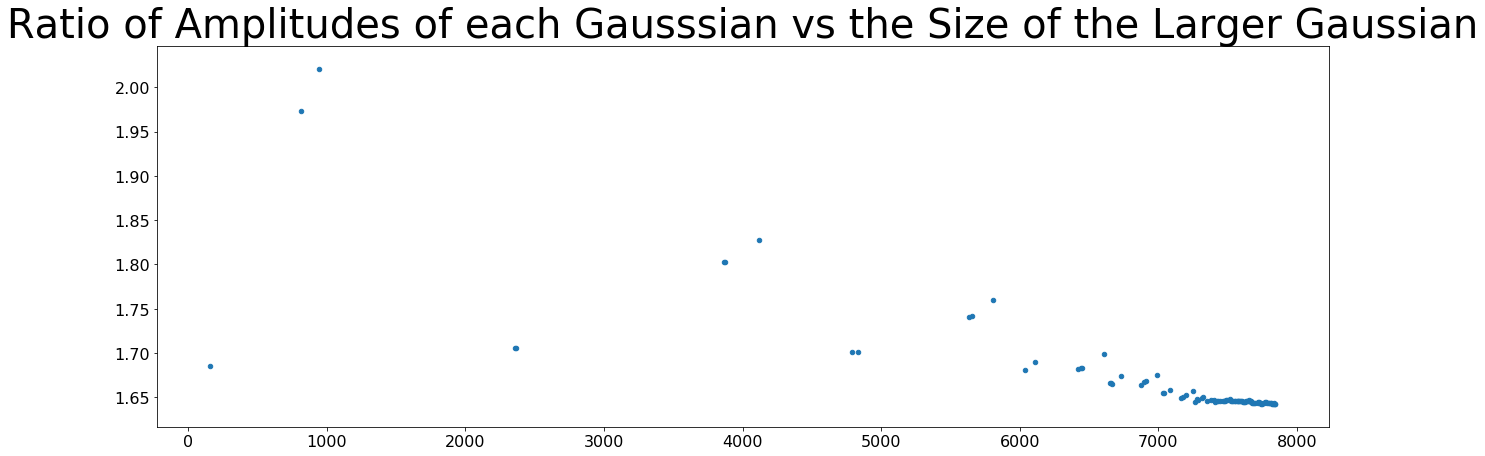

In [36]:
ampratios = []
bigamps = []
plt.figure(figsize=(21,7))
plt.title('Ratio of Amplitudes of each Gausssian vs the Size of the Larger Gaussian')
for m in range(len(GRparams)):
    ratio = GRparams[m][4]/GRparams[m][1]
    bigamp = GRparams[m][4]
    ampratios.append(ratio)
    bigamps.append(bigamp)
plt.scatter(bigamps,ampratios,s=20)

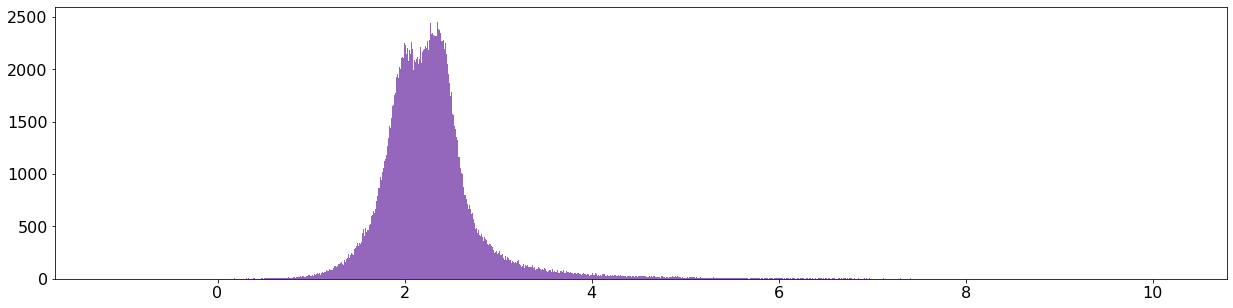

In [37]:
URparams = []
for m in range(1,len(URhists)):
    mparams = getparams2(URhists[m],UR)
    URparams.append(mparams)

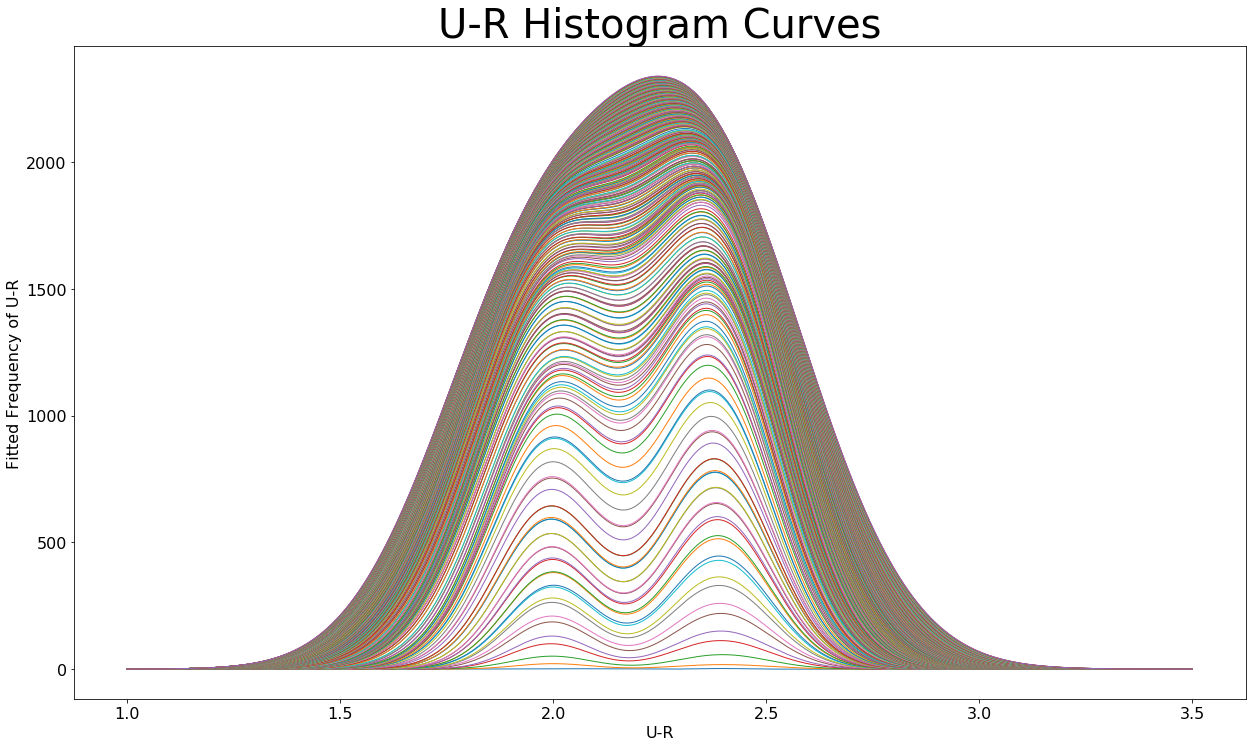

In [38]:
x_interval = np.linspace(1, 3.5, 10000)

plt.figure(figsize=(21,12))
plt.title('U-R Histogram Curves')
plt.ylabel('Fitted Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
for m in range(len(URparams)):
    plt.plot(x_interval, twogaussians(x_interval, *URparams[m]))

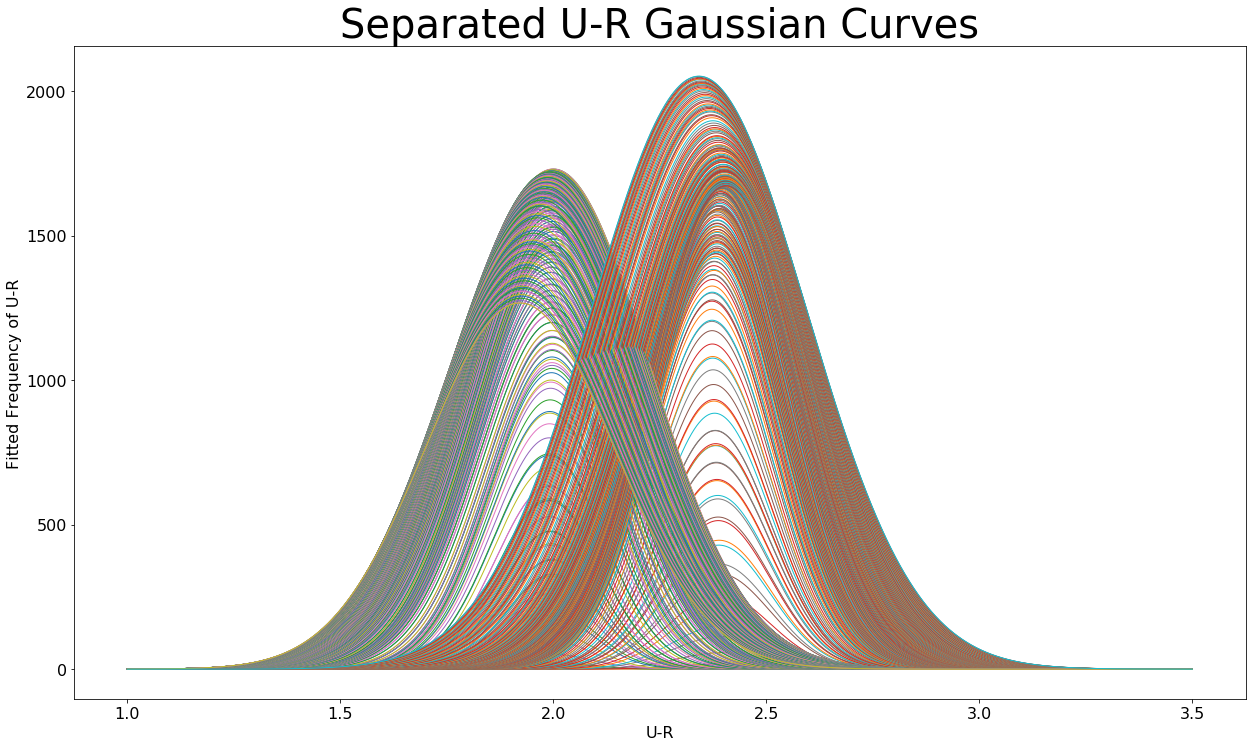

In [39]:
x_interval = np.linspace(1, 3.5, 10000)

plt.figure(figsize=(21,12))
plt.title('Separated U-R Gaussian Curves')
plt.ylabel('Fitted Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
for m in range(len(URparams)):
    plt.plot(x_interval, gaussian(x_interval, URparams[m][0],URparams[m][1],URparams[m][2]))
    plt.plot(x_interval, gaussian(x_interval, URparams[m][3],URparams[m][4],URparams[m][5]))

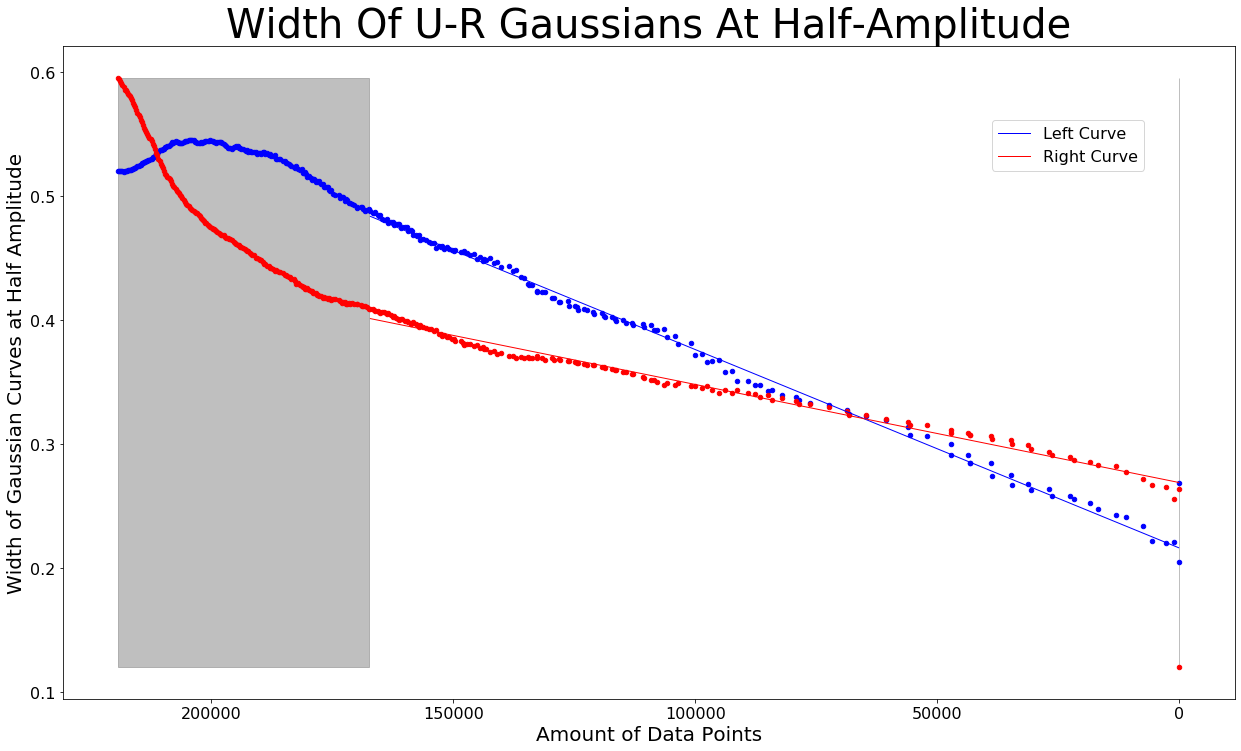

In [40]:
halfwidths1 = []
halfwidths2 = []
amps1 = []
amps2 = []
lengths = []
avgUR1 = []
avgUR2 = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of U-R Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(URparams)):
    avg1 = URparams[m][0]
    avgUR1.append(avg1)
    amp1 = URparams[m][1]
    stdev1 = URparams[m][2]
    avg2 = URparams[m][3]
    avgUR2.append(avg2)
    amp2 = URparams[m][4]
    stdev2 = URparams[m][5]
    lengths.append(len(URhists[m]))
    zero1=brentq(halfgaussian,1,avg1,args=(avg1, amp1, stdev1))
    zero2=brentq(halfgaussian,avg1,3,args=(avg1, amp1, stdev1))
    zero3=brentq(halfgaussian,1,avg2,args=(avg2, amp2, stdev2))
    zero4=brentq(halfgaussian,avg2,3,args=(avg2, amp2, stdev2))
    zerodiff1 = zero2-zero1
    zerodiff2 = zero4-zero3
    halfwidths1.append(zerodiff1)
    halfwidths2.append(zerodiff2)
    amps1.append(amp1)
    amps2.append(amp2)
end = 155
plt.fill_between(lengths[end:],len(lengths[end:])*[max(halfwidths2)],len(lengths[end:])*[min(halfwidths2)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths2)],len(lengths[:2])*[min(halfwidths2)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths1,s=20,color="blue")
plt.scatter(lengths,halfwidths2,s=20,color="red")

HAparamsUR1, _ = curve_fit(linearline,lengths[1:end],halfwidths1[1:end])
HAparamsUR2, _ = curve_fit(linearline,lengths[1:end],halfwidths2[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsUR1),color="blue", label = "Left Curve")
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsUR2),color="red", label = "Right Curve")
plt.legend(loc='best', bbox_to_anchor=(0.43, 0.4, 0.5, 0.5),fontsize='16')



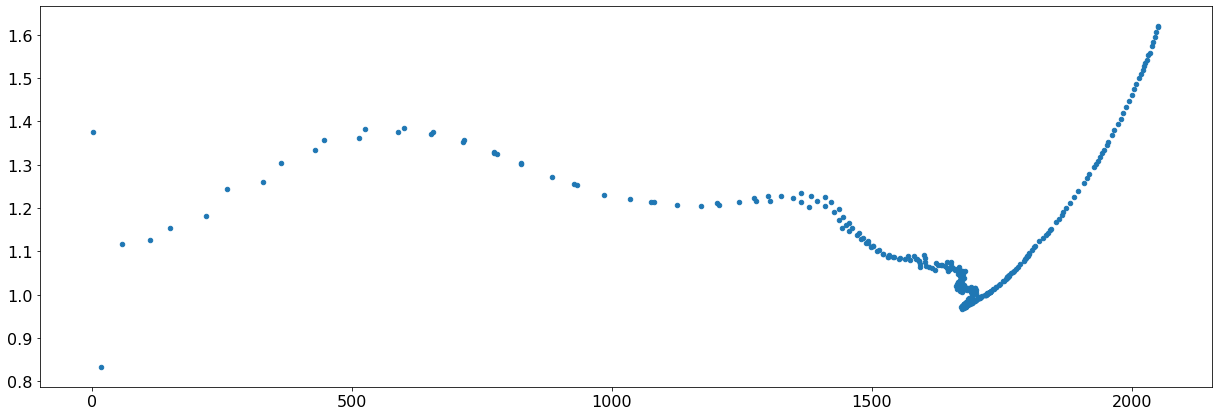

In [41]:
ampratios = []
bigamps = []
plt.figure(figsize=(21,7))
for m in range(len(URparams)):
    ratio = URparams[m][4]/URparams[m][1]
    bigamp = URparams[m][4]
    ampratios.append(ratio)
    bigamps.append(bigamp)
plt.scatter(bigamps,ampratios,s=20)

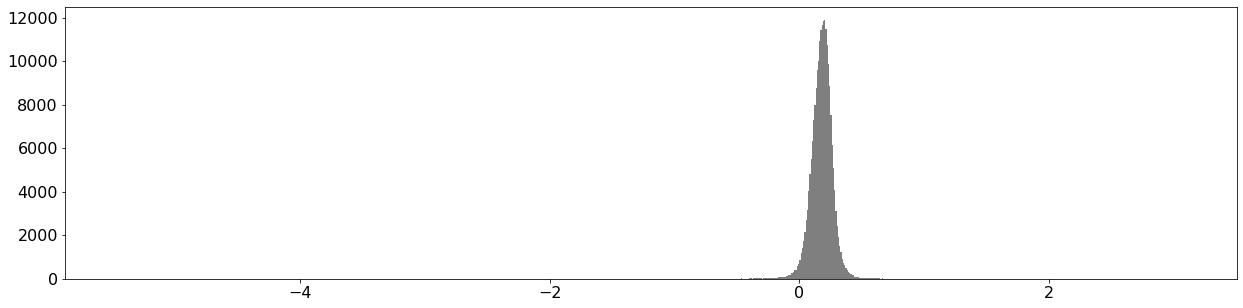

In [42]:
RIparams = []
for m in range(1,len(RIhists)):
    mparams = getparams1(RIhists[m],RI)
    RIparams.append(mparams)

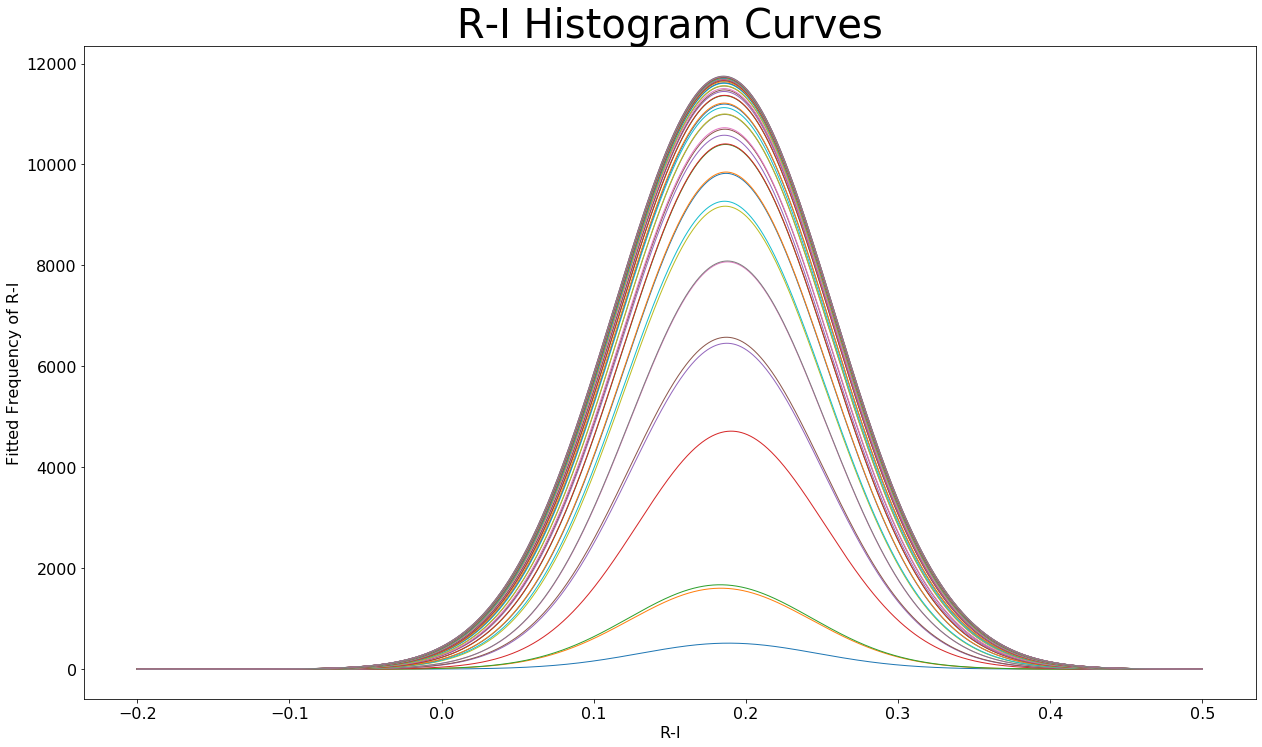

In [43]:
x_interval = np.linspace(-0.2, 0.5, 10000)

plt.figure(figsize=(21,12))
plt.title('R-I Histogram Curves')
plt.ylabel('Fitted Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
for m in range(len(RIparams)):
    plt.plot(x_interval, gaussian(x_interval, *RIparams[m]))

[1.10654158e-07 1.40016466e-01]


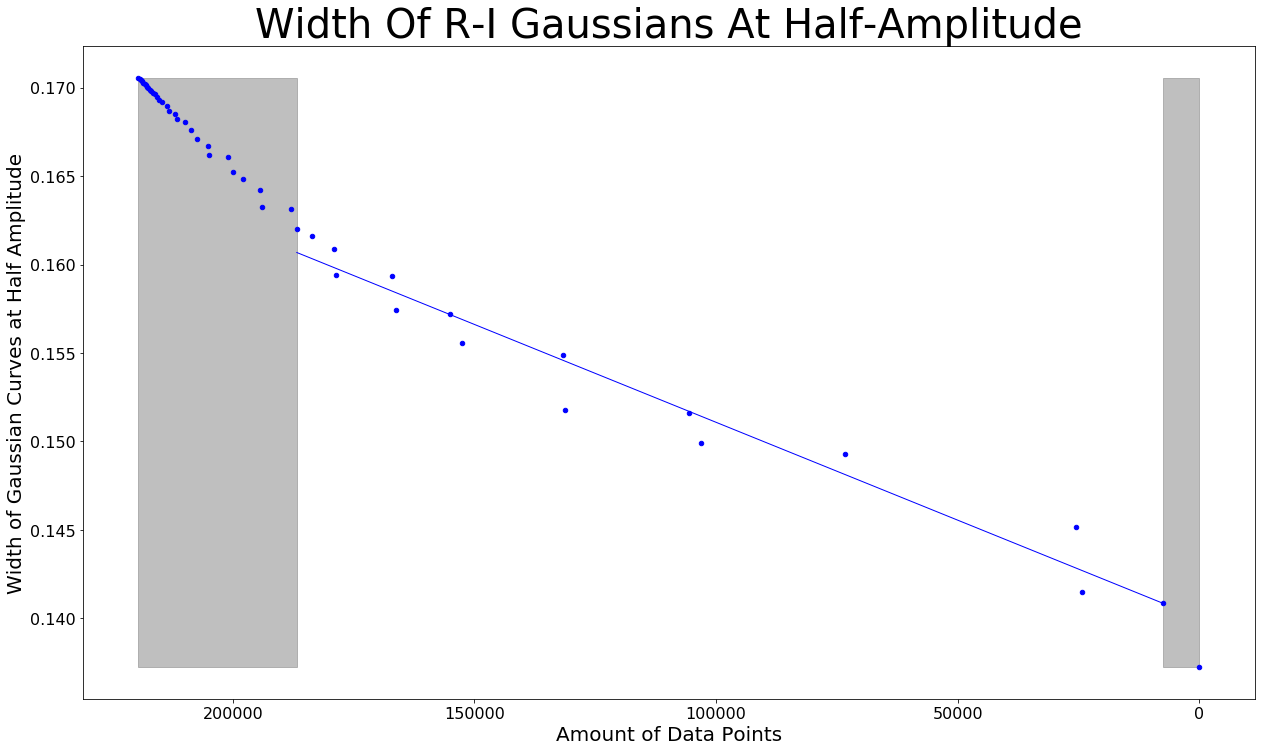

In [44]:
halfwidths = []
amps = []
lengths = []
avgRI = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of R-I Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(RIparams)):
#for m in range(10):
    avg = RIparams[m][0]
    avgRI.append(avg)
    amp = RIparams[m][1]
    stdev = RIparams[m][2]
    lengths.append(len(RIhists[m]))
    zero1=brentq(halfgaussian,0,avg,args=(avg, amp, stdev))
    zero2=brentq(halfgaussian,avg,3,args=(avg, amp, stdev))
    zerodiff = zero2-zero1
    halfwidths.append(zerodiff)
    amps.append(amp)
end = 17
plt.fill_between(lengths[end-1:],len(lengths[end-1:])*[max(halfwidths)],len(lengths[end-1:])*[min(halfwidths)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths)],len(lengths[:2])*[min(halfwidths)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths,s=20,color="blue")

HAparamsRI, _ = curve_fit(linearline,lengths[1:end],halfwidths[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsRI),color="blue")
print(HAparamsRI)

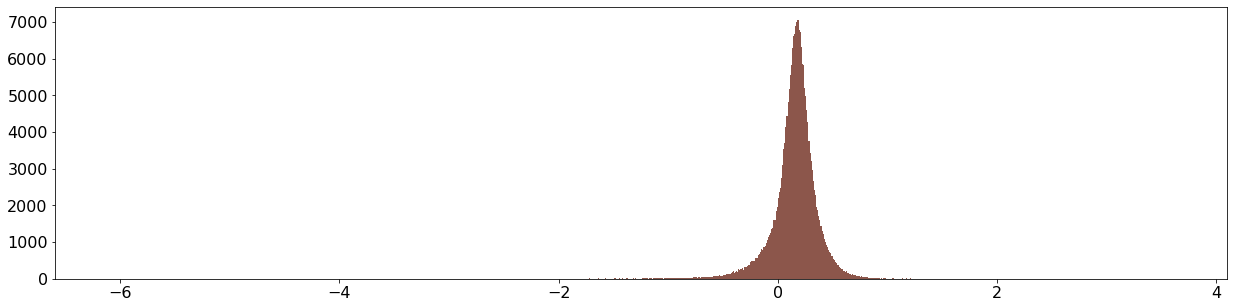

In [45]:
RZparams = []
for m in range(1,len(RZhists)):
    mparams = getparams1(RZhists[m],RZ)
    RZparams.append(mparams)

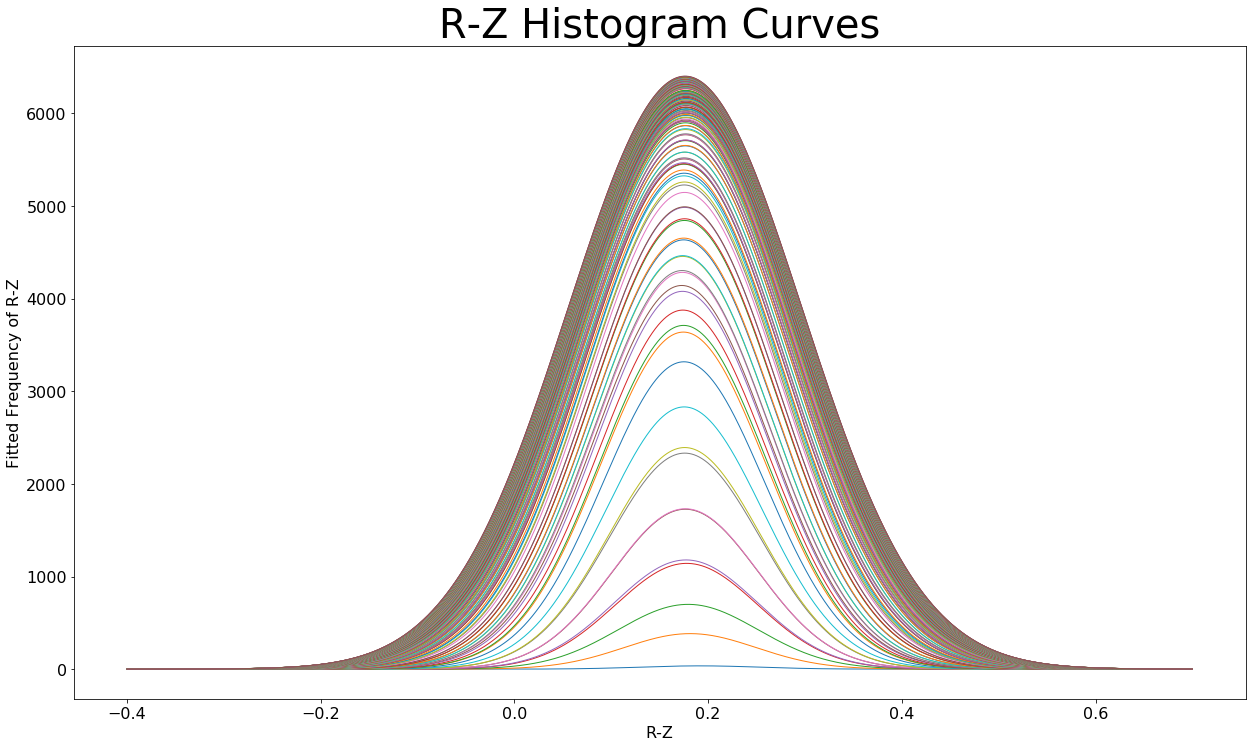

In [46]:
x_interval = np.linspace(-0.4, 0.7, 10000)

plt.figure(figsize=(21,12))
plt.title('R-Z Histogram Curves')
plt.ylabel('Fitted Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
for m in range(len(RZparams)):
    plt.plot(x_interval, gaussian(x_interval, *RZparams[m]))

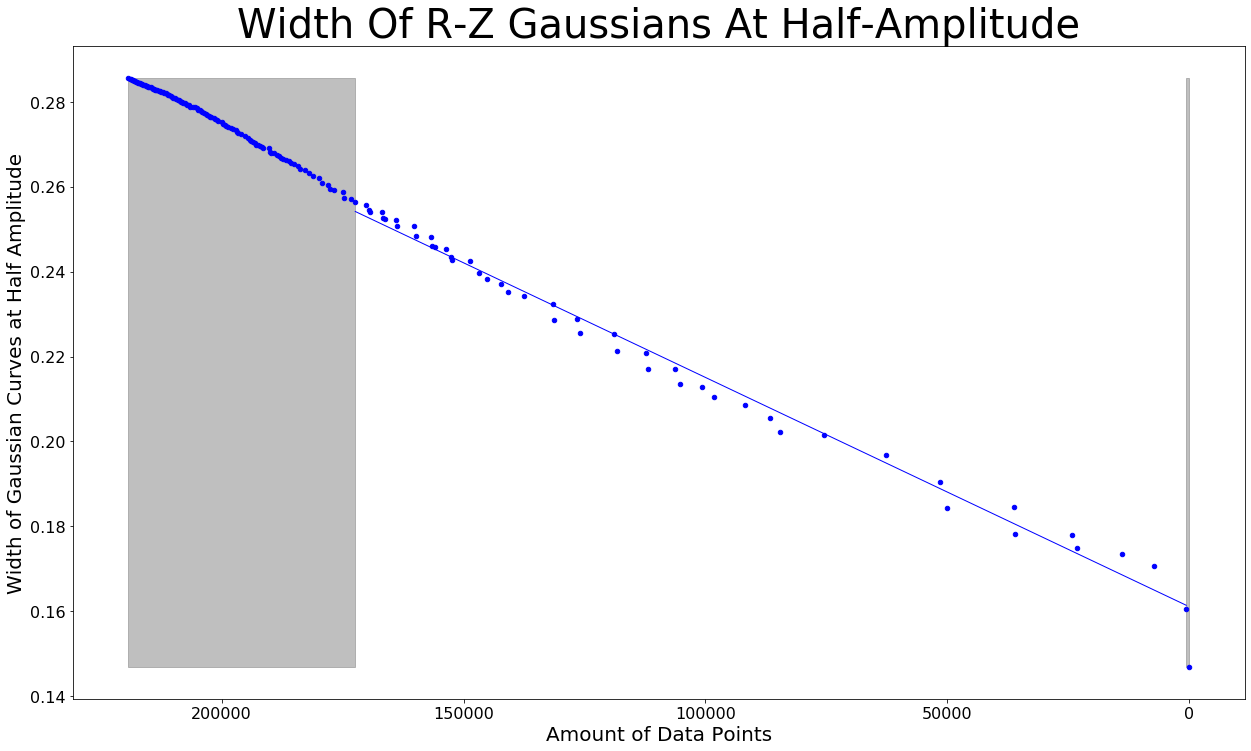

In [47]:
halfwidths = []
amps = []
lengths = []
avgRZ = []
plt.figure(figsize=(21,12))
plt.xlabel('Amount of Data Points')
plt.ylabel('Width of Gaussian Curves at Half Amplitude')
plt.title('Width Of R-Z Gaussians At Half-Amplitude')
ax = plt.gca()
ax.invert_xaxis()

for m in range(len(RZparams)):
#for m in range(10):
    avg = RZparams[m][0]
    avgRZ.append(avg)
    amp = RZparams[m][1]
    stdev = RZparams[m][2]
    lengths.append(len(RZhists[m]))
    zero1=brentq(halfgaussian,0,avg,args=(avg, amp, stdev))
    zero2=brentq(halfgaussian,avg,.5,args=(avg, amp, stdev))
    zerodiff = zero2-zero1
    halfwidths.append(zerodiff)
    amps.append(amp)
end = 50
plt.fill_between(lengths[end-1:],len(lengths[end-1:])*[max(halfwidths)],len(lengths[end-1:])*[min(halfwidths)], color='grey', alpha='0.5')
plt.fill_between(lengths[:2],len(lengths[:2])*[max(halfwidths)],len(lengths[:2])*[min(halfwidths)], color='grey', alpha='0.5')

plt.scatter(lengths,halfwidths,s=20,color="blue")

HAparamsRZ, _ = curve_fit(linearline,lengths[1:end],halfwidths[1:end])
plt.plot(lengths[1:end],linearline(lengths[1:end],*HAparamsRZ),color="blue")


In [48]:
#calculate standard deviation for each gaussian as the amplitude approaches zero

sigmaGR1 = HAparamsGR1[1] / 2.355
sigmaGR2 = HAparamsGR2[1] / 2.355
sigmaUR1 = HAparamsUR1[1] / 2.355
sigmaUR2 = HAparamsUR2[1] / 2.355
sigmaRI = HAparamsRI[1] / 2.355
sigmaRZ = HAparamsRZ[1] / 2.355

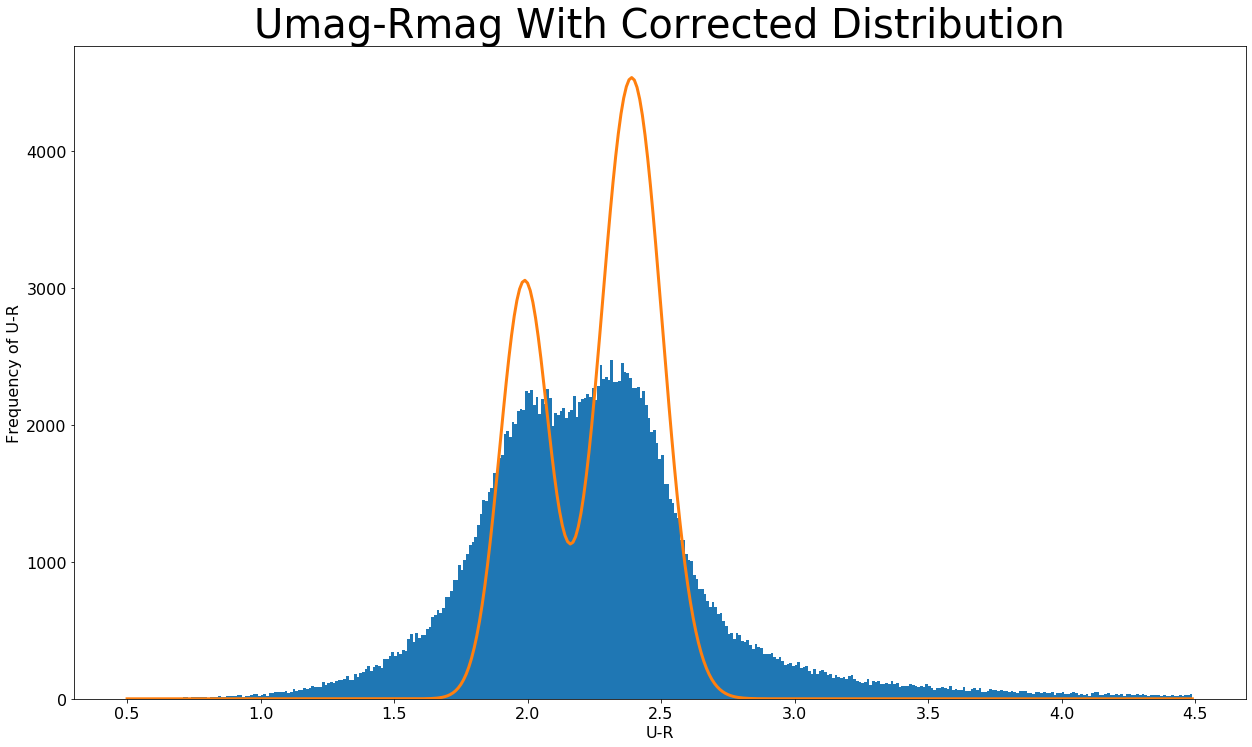

In [49]:
x_interval = np.arange(0.5,4.5,0.01)
averageUR1 = np.average(avgUR1)
averageUR2 = np.average(avgUR2)
newampUR1 = URparams[-1][1]*URparams[-1][2]/sigmaUR1
newampUR2 = URparams[-1][4]*URparams[-1][5]/sigmaUR2

plt.figure(figsize=(21,12))
plt.hist(URhists[-1], bins=np.arange(0.5,4.5,0.01))
plt.title('Umag-Rmag With Corrected Distribution')
plt.plot(x_interval, twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2),linewidth=3)
plt.ylabel('Frequency of U-R',fontsize='16')
plt.xlabel('U-R',fontsize='16')
#plt.plot(x_interval, twogaussians(x_interval, *URparams[-1]))
plt.show()

In [50]:
area = sum(twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))*.01
print('area of curve is ',area)
print('area of histogram is ',len(URhists[-1])*.01)

area of curve is  2000.6224427748987
area of histogram is  2194.84


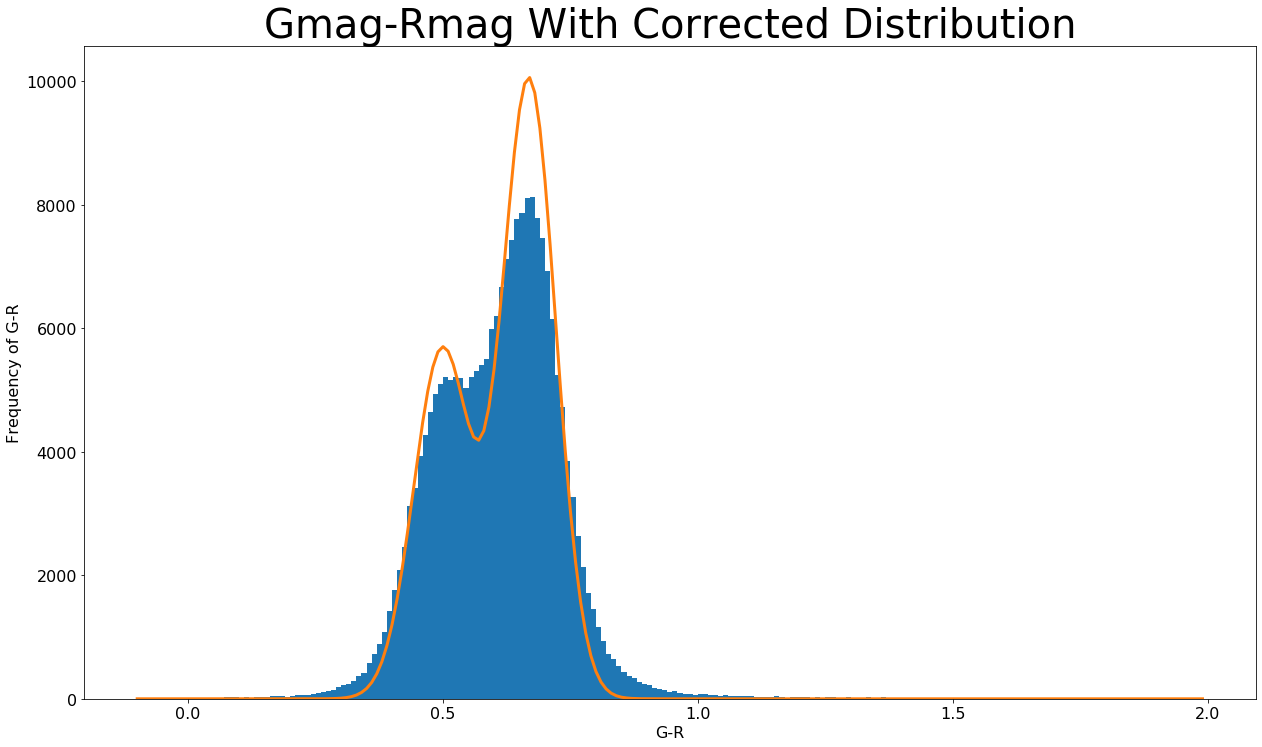

In [51]:
x_interval =np.arange(-0.1,2,0.01)
averageGR1 = np.average(avgGR1)
averageGR2 = np.average(avgGR2)
newampGR1 = GRparams[-1][1]*GRparams[-1][2]/sigmaGR1
newampGR2 = GRparams[-1][4]*GRparams[-1][5]/sigmaGR2

plt.figure(figsize=(21,12))
plt.hist(GRhists[-1], bins=np.arange(-0.1,2,0.01))
plt.title('Gmag-Rmag With Corrected Distribution')
plt.plot(x_interval, twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2),linewidth=3)
plt.ylabel('Frequency of G-R',fontsize='16')
plt.xlabel('G-R',fontsize='16')
plt.show()

In [52]:
area = sum(twogaussians(x_interval, averageGR1, newampGR1, sigmaGR1, averageGR2, newampGR2, sigmaGR2))*.01
print('area of curve is ',area)
print('area of histogram is ',len(GRhists[-1])*.01)

area of curve is  2109.9743535159178
area of histogram is  2193.42


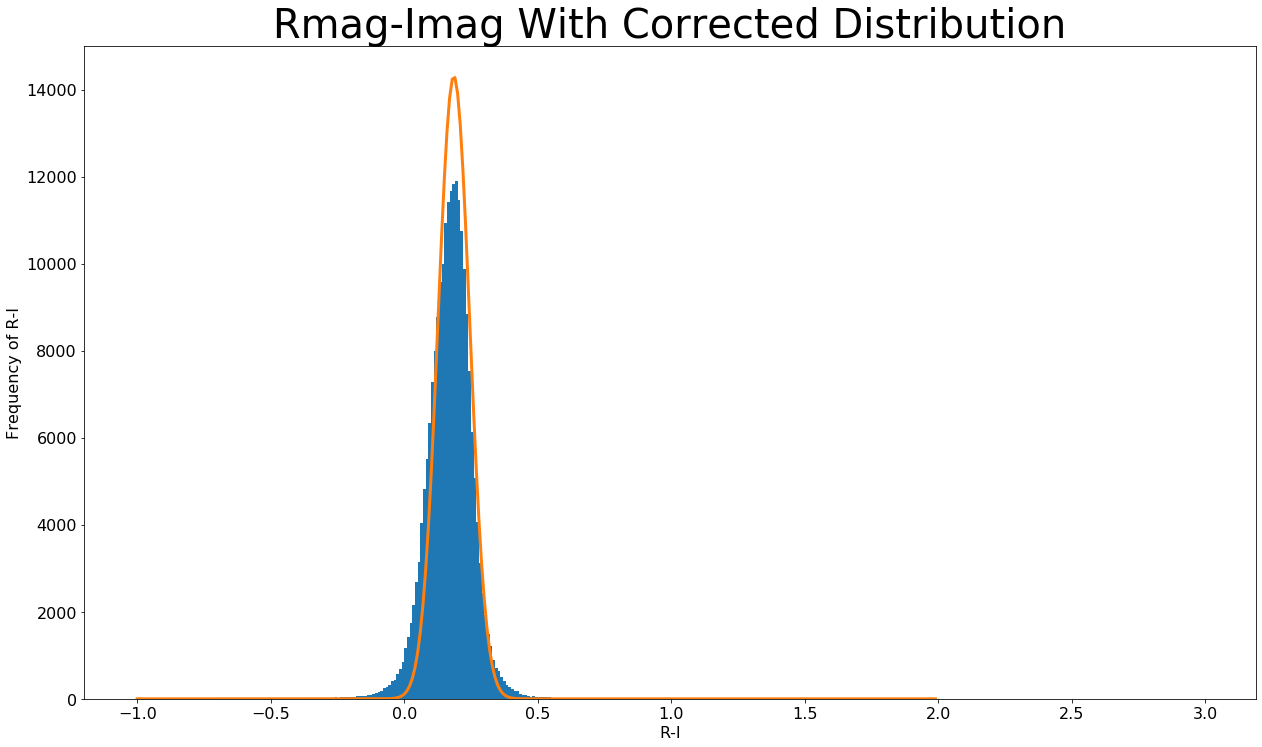

In [53]:
x_interval = np.arange(-1,2,0.01)
averageRI = np.average(avgRI)

newampRI = RIparams[-1][1]*RIparams[-1][2]/sigmaRI

plt.figure(figsize=(21,12))
plt.hist(RIhists[-1], bins=np.arange(-1,3,0.01))
plt.title('Rmag-Imag With Corrected Distribution')
plt.plot(x_interval, gaussian(x_interval, averageRI, newampRI, sigmaRI),linewidth=3)
plt.ylabel('Frequency of R-I',fontsize='16')
plt.xlabel('R-I',fontsize='16')
plt.show()

In [54]:
area = sum(gaussian(np.arange(min(RIhists[-1]),max(RIhists[-1]),0.01), averageRI, newampRI, sigmaRI))*.01
print('area of curve is ',area)
print('area of histogram is ',len(RIhists[-1])*.01)

area of curve is  2132.995564730537
area of histogram is  2197.53


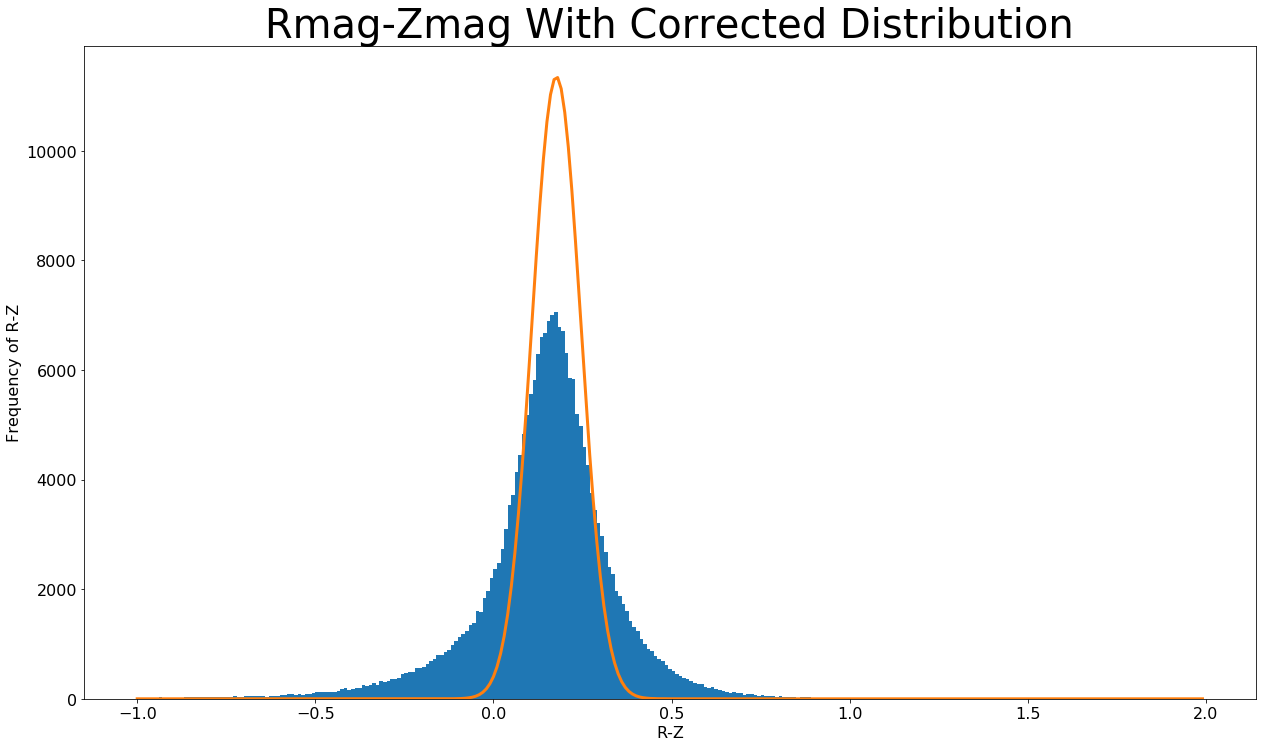

In [55]:
x_interval = np.arange(-1,2,0.01)
averageRZ = np.average(avgRZ)

newampRZ = RZparams[-1][1]*RZparams[-1][2]/sigmaRZ

plt.figure(figsize=(21,12))
plt.hist(RZhists[-1], bins=np.arange(-1,2,0.01))
plt.title('Rmag-Zmag With Corrected Distribution')
plt.plot(x_interval, gaussian(x_interval, averageRZ, newampRZ, sigmaRZ),linewidth=3)
plt.ylabel('Frequency of R-Z',fontsize='16')
plt.xlabel('R-Z',fontsize='16')
plt.show()

In [56]:
area = sum(gaussian(np.arange(min(RZhists[-1]),max(RZhists[-1]),0.01), averageRZ, newampRZ, sigmaRZ))*.01
print('area of curve is ',area)
print('area of histogram is ',len(RZhists[-1])*.01)

area of curve is  1946.0823628207947
area of histogram is  2194.8


In [113]:
#pass this function l=length of desired dataset, xi and xf are the min and max x values
# f is the function, accepting one input variable, x-coordinate of the curve that the simulated data is supposed to match

def sim_data(l,xi,xf,ymax,f):
    newsims = []
    while len(newsims) < l:
        u = (xf-xi)*r.random() + xi
        p = f(u)
        v = ymax*r.random()
        if v <= p:
            newsims.append(u)
    return newsims



In [114]:
'''
x_interval = np.arange(0.5,4.5,0.01)
#input parameters from refined UR distribution into the twogaussian function. use the twogaussian function as the curve to generate simulated data
def URsim(a): 
    twogaussians(a, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2)

'''

'\nx_interval = np.arange(0.5,4.5,0.01)\n#input parameters from refined UR distribution into the twogaussian function. use the twogaussian function as the curve to generate simulated data\ndef URsim(a): \n    twogaussians(a, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2)\n\n'

In [129]:
URsim = lambda a :  twogaussians(a, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2)

In [134]:
URymax = max(twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))
URsimdata = sim_data(len(URhist),0.5,4.5,URymax,URsim)

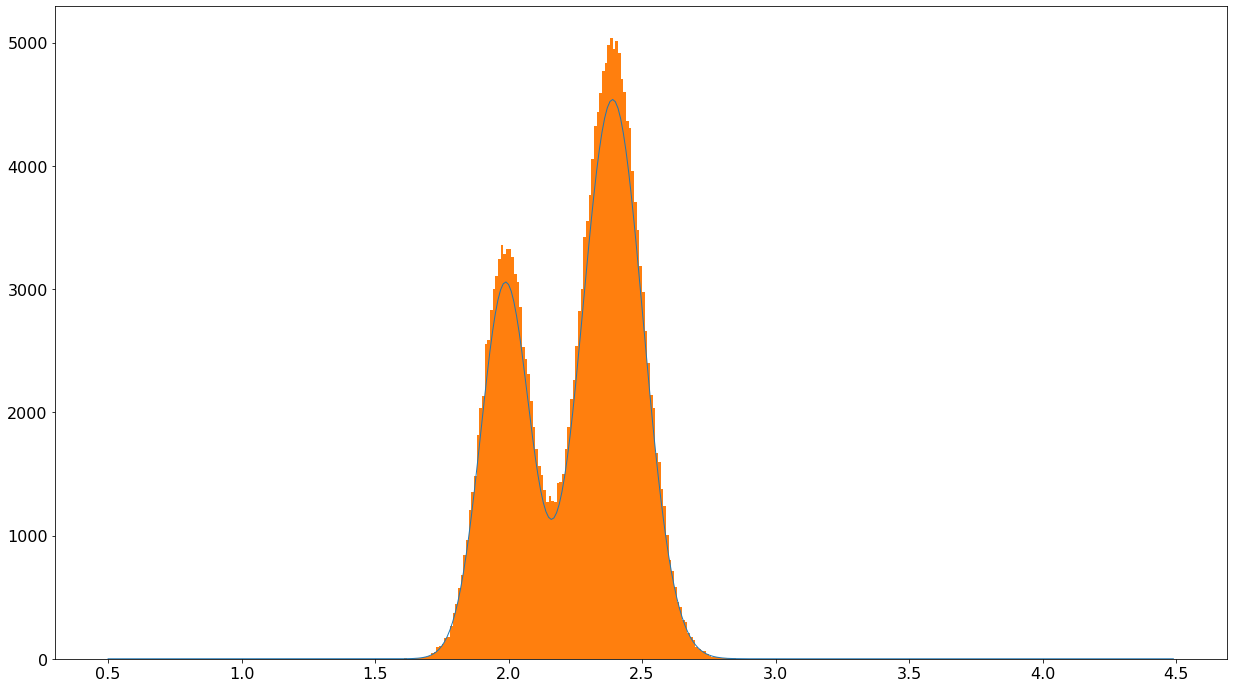

In [136]:
x_interval = np.arange(0.5,4.5,0.01)

plt.figure(figsize=(21,12))
plt.plot(x_interval,twogaussians(x_interval, averageUR1, newampUR1, sigmaUR1, averageUR2, newampUR2, sigmaUR2))
plt.hist(URsimdata, bins=np.arange(0.5,4.5,0.01))
plt.show()